## CASA0002_Urban simulation

# Codes for Assessmet

Zhiyuan Li

April 2021

Click 'Restart Kernel and Run All' so that all graphs used in the paper(.pdf document) are produced.

## Preparations

In [1]:
import networkx as nx ##
import matplotlib.pyplot as plt ##  
import numpy as np ##
import pandas as pd
#import geopandas as gpd
#import seaborn as sns
#import os

In [2]:
def lc(g): #number of node in largest component
    y = max(nx.connected_components(g), key=len)
    x = len(y)/len(g.nodes())
    return x

# 1 Network from Shapefile(g_shp, undirected)

## Create a graph from the shapefile

In [3]:
# Create a graph from the shapefile
g_shp=nx.read_shp('underground.shp',geom_attrs=False)
df = nx.to_pandas_edgelist(g_shp) # 没有nx.to_pandas_nodelist  df是个edgelist
df[0:5]

,source,target,station_1_,station_1,station_2,toid_seq,ShpName,station_2_,distance
0,"(-0.1571, 51.5226)","(-0.1631, 51.5225)",Baker Street,11,163,1,underground,Marylebone,416.586050
1,"(-0.1571, 51.5226)","(-0.1466, 51.5234)",Baker Street,11,212,2,underground,Regent's Park,734.173636
2,"(-0.1571, 51.5226)","(-0.17, 51.5203)",Baker Street,11,83,171,underground,Edgware Road (C),931.211577
3,"(-0.1571, 51.5226)","(-0.1439, 51.5238)",Baker Street,11,104,225,underground,Great Portland Street,925.826411
4,"(-0.1571, 51.5226)","(-0.1494, 51.5142)",Baker Street,11,28,197,underground,Bond Street,1076.607648


## Give to the nodes the names of the stations

In [4]:
nod_st1={(e1):weight for e1, e2, weight in g_shp.edges(data='station_1_')}
nod_st2={(e2):weight for e1, e2, weight in g_shp.edges(data='station_2_')}
#nod_all = {**nod_st1, **nod_st2} #for python 3.5 and greater

#In Python 2, (or 3.4 or lower) write a function
nod_all = nod_st1.copy()   # start with x's keys and values
nod_all.update(nod_st2)

nx.set_node_attributes(g_shp,nod_all,'station')

# get the nodes attributes:
list(g_shp.nodes(data=True))[0:10]

[((-0.1571, 51.5226), {'station': 'Baker Street'}),
 ((-0.1631, 51.5225), {'station': 'Marylebone'}),
 ((-0.1466, 51.5234), {'station': "Regent's Park"}),
 ((-0.1247, 51.508), {'station': 'Charing Cross'}),
 ((-0.1223, 51.5074), {'station': 'Embankment'}),
 ((-0.1342, 51.5098), {'station': 'Picadilly Circus'}),
 ((-0.1679, 51.5199), {'station': 'Edgware Road (B)'}),
 ((-0.1755, 51.5154), {'station': 'Paddington'}),
 ((-0.1001, 51.4943), {'station': 'Elephant & Castle'}),
 ((-0.1115, 51.4991), {'station': 'Lambeth North'})]

## Give to the nodes the coordinations of the stations

In [5]:
#Finally, we will give an ID to each node(station), such that it will be easier later to call them:
#1.Create a new attribute with node coordinates (now coord are the keys and we do not want to lose that information
nod_coord = {(e1):e1 for e1 in g_shp.nodes()}
nx.set_node_attributes(g_shp,nod_coord,'station_coord')
list(g_shp.nodes(data=True))[0:10]

[((-0.1571, 51.5226),
  {'station': 'Baker Street', 'station_coord': (-0.1571, 51.5226)}),
 ((-0.1631, 51.5225),
  {'station': 'Marylebone', 'station_coord': (-0.1631, 51.5225)}),
 ((-0.1466, 51.5234),
  {'station': "Regent's Park", 'station_coord': (-0.1466, 51.5234)}),
 ((-0.1247, 51.508),
  {'station': 'Charing Cross', 'station_coord': (-0.1247, 51.508)}),
 ((-0.1223, 51.5074),
  {'station': 'Embankment', 'station_coord': (-0.1223, 51.5074)}),
 ((-0.1342, 51.5098),
  {'station': 'Picadilly Circus', 'station_coord': (-0.1342, 51.5098)}),
 ((-0.1679, 51.5199),
  {'station': 'Edgware Road (B)', 'station_coord': (-0.1679, 51.5199)}),
 ((-0.1755, 51.5154),
  {'station': 'Paddington', 'station_coord': (-0.1755, 51.5154)}),
 ((-0.1001, 51.4943),
  {'station': 'Elephant & Castle', 'station_coord': (-0.1001, 51.4943)}),
 ((-0.1115, 51.4991),
  {'station': 'Lambeth North', 'station_coord': (-0.1115, 51.4991)})]

##  Relabel each node with an ordered integer ！！给站点重新编号 node_list

In [6]:
#2.now relabel each node with an ordered integer:
node_list = list(g_shp.nodes())
mapping = {node_list[i]:i for i in range(len(node_list))}
g_shp = nx.relabel_nodes(g_shp, mapping)
list(g_shp.nodes(data=True))[0:10]

[(0, {'station': 'Baker Street', 'station_coord': (-0.1571, 51.5226)}),
 (1, {'station': 'Marylebone', 'station_coord': (-0.1631, 51.5225)}),
 (2, {'station': "Regent's Park", 'station_coord': (-0.1466, 51.5234)}),
 (3, {'station': 'Charing Cross', 'station_coord': (-0.1247, 51.508)}),
 (4, {'station': 'Embankment', 'station_coord': (-0.1223, 51.5074)}),
 (5, {'station': 'Picadilly Circus', 'station_coord': (-0.1342, 51.5098)}),
 (6, {'station': 'Edgware Road (B)', 'station_coord': (-0.1679, 51.5199)}),
 (7, {'station': 'Paddington', 'station_coord': (-0.1755, 51.5154)}),
 (8, {'station': 'Elephant & Castle', 'station_coord': (-0.1001, 51.4943)}),
 (9, {'station': 'Lambeth North', 'station_coord': (-0.1115, 51.4991)})]

##  Fix the issure mapping node

In [7]:
#Later when using the Commuters data we will have an issue mapping node 'Heathrow Terminals 1, 2 & 3', 
#so we are going to rename it here:
#1. find the node 'Heathrow Terminals 1, 2 & 3'
nodes = [(x,y) for x,y in g_shp.nodes(data='station') if 'Heathrow' in str(y)]
nodes

[(258, 'Heathrow Terminals 1, 2 & 3'), (259, 'Heathrow Terminal 4')]

In [8]:
#2.Rename it with the name given by the the commuters file :
g_shp.nodes[258]['station']='Heathrow Terminals 123'

## Transform the type of graph from directed to undirected

In [9]:
#transform the type of graph from directed to undirected using the following function:
g_shp_un = g_shp.to_undirected()
print(nx.info(g_shp_un))
list(g_shp_un.nodes(data=True))[0:10]

Name: 
Type: Graph
Number of nodes: 306
Number of edges: 353
Average degree:   2.3072


[(0, {'station': 'Baker Street', 'station_coord': (-0.1571, 51.5226)}),
 (1, {'station': 'Marylebone', 'station_coord': (-0.1631, 51.5225)}),
 (2, {'station': "Regent's Park", 'station_coord': (-0.1466, 51.5234)}),
 (3, {'station': 'Charing Cross', 'station_coord': (-0.1247, 51.508)}),
 (4, {'station': 'Embankment', 'station_coord': (-0.1223, 51.5074)}),
 (5, {'station': 'Picadilly Circus', 'station_coord': (-0.1342, 51.5098)}),
 (6, {'station': 'Edgware Road (B)', 'station_coord': (-0.1679, 51.5199)}),
 (7, {'station': 'Paddington', 'station_coord': (-0.1755, 51.5154)}),
 (8, {'station': 'Elephant & Castle', 'station_coord': (-0.1001, 51.4943)}),
 (9, {'station': 'Lambeth North', 'station_coord': (-0.1115, 51.4991)})]

## Get position for the plot

In [10]:
# Extract the coordinates from every node:
pos_shp_un = {i: xy for i,xy in g_shp_un.nodes(data='station_coord')}# {xy: xy for xy in g_shp.nodes()}
#{n:nx.single_source_dijkstra_path_length(g_shp_un, n, weight='distance') for n in g_shp_un.nodes() }
#pos = {e1: xy for e1,xy in g_OD.nodes(data='station_coord')}
pos=pos_shp_un
print(pos_shp_un[0])

(-0.1571, 51.5226)


# 2 Centrality measures

### Betweenness Centrality on nodes (btcnd)

In [11]:
# Topological betweenness centrality:
# Compute the topological betweenness centrality for the network(not considering the distance between stations):
betc_t=nx.betweenness_centrality(g_shp_un, normalized=False) #  , weight='distance'  !!!
# Add these values to the nodes attributes:
nx.set_node_attributes(g_shp_un,betc_t,'betc_t')

#pd.DataFrame.from_dict(betc_t,columns=['betc_t'],orient='index')[0:10]

In [12]:
# get the nodes attributes:
#list(g_shp.nodes(data=True))[0:10]

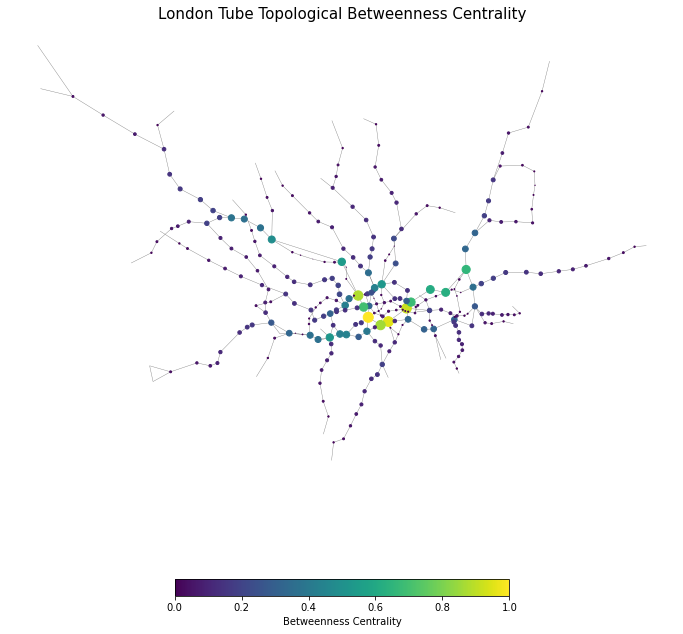

In [13]:
# Set colour and size of nodes according to betweenness values
betc_t_values=[(i[1]['betc_t']) for i in g_shp_un.nodes(data=True)]

betc_t_color=[(i[1]['betc_t']/max(betc_t_values)) for i in g_shp_un.nodes(data=True)]
betc_t_size=[(i[1]['betc_t']/max(betc_t_values)*100) for i in g_shp_un.nodes(data=True)]
# Plot graph

fig, ax = plt.subplots(figsize=(12,12))
nx.draw_networkx_edges(g_shp_un, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(g_shp_un,
        pos = pos,
        node_color= betc_t_color,
        node_size= betc_t_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London Tube Topological Betweenness Centrality",fontsize=15)
plt.show()

### Closeness Centrality on nodes:

In [14]:
# Topological closeness centrality: 
cloc_t=nx.closeness_centrality(g_shp_un) #  , distance='distance'  !!!
# Add these values to the nodes attributes:
nx.set_node_attributes(g_shp_un,cloc_t,'cloc_t')

#pd.DataFrame.from_dict(cloc_t,columns=['cloc_t'],orient='index')[0:10]

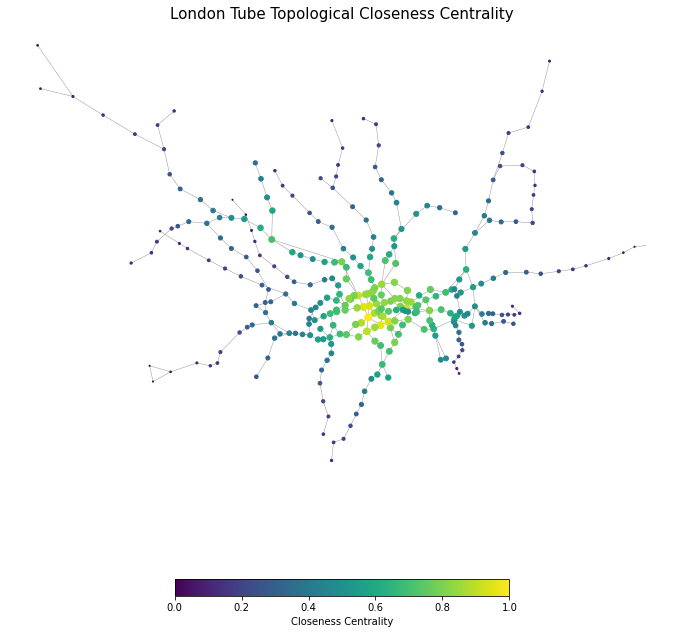

In [15]:
# Set color and width of nodes according to the closeness values

cloc_t_values=[(i[1]['cloc_t']) for i in g_shp_un.nodes(data=True)]

cloc_t_color=[(i[1]['cloc_t']-min(cloc_t_values))/(max(cloc_t_values)-min(cloc_t_values)) for i in g_shp_un.nodes(data=True)]
cloc_t_size=[((i[1]['cloc_t']-min(cloc_t_values))/(max(cloc_t_values)-min(cloc_t_values))*50) for i in g_shp_un.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(g_shp_un, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(g_shp_un,
        pos = pos,
        node_color= cloc_t_color,
        node_size= cloc_t_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London Tube Topological Closeness Centrality",fontsize=15)
plt.show()

### Degree Centrality on nodes

In [16]:
# Topological degree centrality: 
degc_t=nx.degree_centrality(g_shp_un)
# Add these values to the nodes attributes:

#!!!!!!!
nx.set_node_attributes(g_shp_un,dict(degc_t),'degc_t')

pd.DataFrame.from_dict(degc_t,columns=['degc_t'],orient='index')[0:10] #只是检查下值

,degc_t
0,0.022951
1,0.006557
2,0.006557
3,0.009836
4,0.013115
5,0.013115
6,0.006557
7,0.016393
8,0.009836
9,0.006557


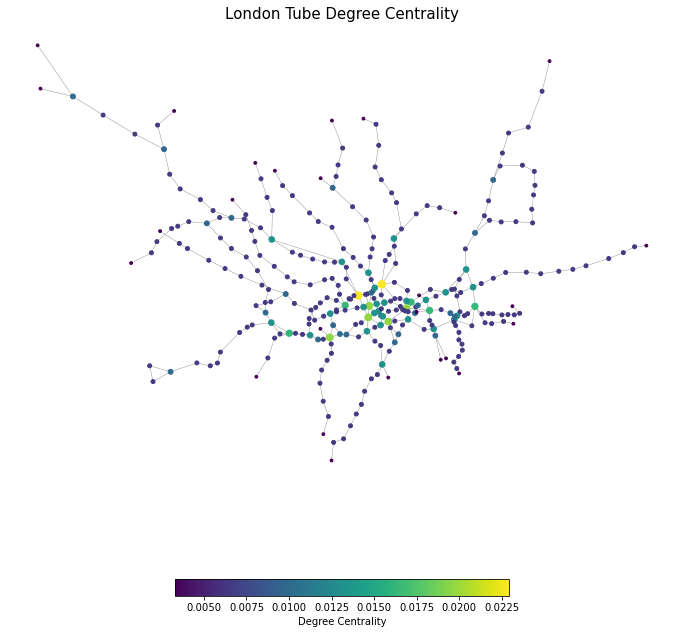

In [17]:
# Set color and width of nodes according to the degree values
#deg_color_norm=[(node['degree_norm']) for i, node in g_dad.nodes(data=True)]
#deg_size_norm=[(node['degree_norm']*1000) for i, node in g_dad.nodes(data=True)]

degc_t_values=[(i[1]['degc_t']) for i in g_shp_un.nodes(data=True)]
# degc_t_color=[(node['degc_t']) for i, node in g_shp_un.nodes(data=True)]
# degc_t_size=[(node['degc_t']*1000) for i, node in g_shp_un.nodes(data=True)]
degc_t_color=[(i[1]['degc_t']) for i in g_shp_un.nodes(data=True)]
degc_t_size=[(i[1]['degc_t']*2400) for i in g_shp_un.nodes(data=True)]
# degc_t_color=[(i[1]['degc_t']/max(degc_t_values)) for i in g_shp_un.nodes(data=True)]
# degc_t_size=[(i[1]['degc_t']/max(degc_t_values)*100) for i in g_shp_un.nodes(data=True)]



# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(g_shp_un, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(g_shp_un,
        pos = pos,
        node_color= degc_t_color,
        node_size= degc_t_size)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London Tube Degree Centrality",fontsize=15)
plt.show()

 # Removal and Calculaiton

## 1Betweenness Centrality

### Copy first

In [18]:
g_shp_un = g_shp.to_undirected()
print(nx.info(g_shp_un))

Name: 
Type: Graph
Number of nodes: 306
Number of edges: 353
Average degree:   2.3072


### Non-Sequencial

In [19]:
betc_t=nx.betweenness_centrality(g_shp_un, normalized=False)
nx.set_node_attributes(g_shp_un,betc_t,'betc_t')

betc_t_values=[(i[1]['betc_t']) for i in g_shp_un.nodes(data=True)]
betc_t_values_x=list(set(betc_t_values))
betc_t_values_x.sort(reverse=True)
print("原betweenness centrality值数量是"+str(len(betc_t_values))+"，去重后是"+str(len(betc_t_values_x)))
betc_t_values_x[0:10]

原betweenness centrality值数量是306，去重后是167


[16399.69880952378,
 15644.492857142834,
 15008.035714285694,
 14441.576984126983,
 14139.401190476206,
 11429.867460317462,
 11186.00238095236,
 10814.90238095238,
 10302.93809523808,
 10017.326190476193]

In [20]:
# Non-sequential 

#建立空list
betc_t_removednode=['No removal']
betc_t_largec=[]
betc_t_efficiency=[]
#计算原始measure数值
temp_largec=lc(g_shp_un)
temp_efficiency=nx.global_efficiency(g_shp_un)
#放到表里
betc_t_largec.append(temp_largec)
betc_t_efficiency.append(temp_efficiency)
# 查看list内容
print(betc_t_removednode)
print('The original largestcomponent is ' + str(temp_largec))
print('The original efficiency is ' + str(temp_efficiency))

['No removal']
The original largestcomponent is 1.0
The original efficiency is 0.1021247523344587


In [21]:
for e in range(0,10): #移除的次数是10次
    betc_node_temp=[n for n in g_shp_un.nodes() if g_shp_un.nodes[n]['betc_t'] == betc_t_values_x[e]]
    print('第{0}次移除'.format(e+1)) #e+1？
# 循环记录名称移除+再计算
    for i in betc_node_temp:
        #记录名称
        betc_t_removednode.append(g_shp_un.nodes[i]['station'])
        print(g_shp_un.nodes[i]['station'])#输出并记录站点名称
        #移除点
        g_shp_un.remove_nodes_from([i])#[i]可以吗？
        #计算measures
        temp_largec=lc(g_shp_un)
        temp_efficiency=nx.global_efficiency(g_shp_un)
        betc_t_largec.append(temp_largec)
        betc_t_efficiency.append(temp_efficiency)
        print('移除后的largestcomponent是 ' + str(temp_largec))
        print('移除后的efficiency是 ' + str(temp_efficiency))
betc_t_largec = betc_t_largec[0:11]
betc_t_efficiency = betc_t_efficiency[0:11]
betc_t_removednode = betc_t_removednode[0:11]


第1次移除
Green Park
移除后的largestcomponent是 1.0
移除后的efficiency是 0.09898423493735356
第2次移除
Waterloo
移除后的largestcomponent是 1.0
移除后的efficiency是 0.09579290673791988
第3次移除
Bank
移除后的largestcomponent是 1.0
移除后的efficiency是 0.09271262084146155
第4次移除
Baker Street
移除后的largestcomponent是 1.0
移除后的efficiency是 0.08399632571514469
第5次移除
Westminster
移除后的largestcomponent是 1.0
移除后的efficiency是 0.08307504958256004
第6次移除
Bond Street
移除后的largestcomponent是 1.0
移除后的efficiency是 0.07726234001023051
第7次移除
Liverpool Street
移除后的largestcomponent是 1.0
移除后的efficiency是 0.07283740504127313
第8次移除
Stratford
移除后的largestcomponent是 0.9328859060402684
移除后的efficiency是 0.06569445757435068
第9次移除
Mile End
移除后的largestcomponent是 0.9292929292929293
移除后的efficiency是 0.06485180928254695
第10次移除
Bethnal Green
移除后的largestcomponent是 0.9324324324324325
移除后的efficiency是 0.06529148256581846


In [22]:
print(betc_t_removednode)
print(len(betc_t_removednode))

print(betc_t_largec)
print(len(betc_t_largec))

print(betc_t_efficiency)
print(len(betc_t_efficiency))

['No removal', 'Green Park', 'Waterloo', 'Bank', 'Baker Street', 'Westminster', 'Bond Street', 'Liverpool Street', 'Stratford', 'Mile End', 'Bethnal Green']
11
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9328859060402684, 0.9292929292929293, 0.9324324324324325]
11
[0.1021247523344587, 0.09898423493735356, 0.09579290673791988, 0.09271262084146155, 0.08399632571514469, 0.08307504958256004, 0.07726234001023051, 0.07283740504127313, 0.06569445757435068, 0.06485180928254695, 0.06529148256581846]
11


### Sequencial

In [23]:
g_shp_un = g_shp.to_undirected()
print(nx.info(g_shp_un))

Name: 
Type: Graph
Number of nodes: 306
Number of edges: 353
Average degree:   2.3072


In [24]:
#建立空list
betc_t_removednode1=['No removal']
betc_t_largec1=[] 
betc_t_efficiency1=[]

#计算原始measure数值
temp_largec=lc(g_shp_un)
temp_efficiency=nx.global_efficiency(g_shp_un)
#放到表里
betc_t_largec1.append(temp_largec)
betc_t_efficiency1.append(temp_efficiency)
# 查看list内容
print(betc_t_removednode1)
print('The original largestcomponent is ' + str(temp_largec))
print('The original efficiency is ' + str(temp_efficiency))

['No removal']
The original largestcomponent is 1.0
The original efficiency is 0.1021247523344587


In [25]:
betc_t=nx.betweenness_centrality(g_shp_un, normalized=False)
nx.set_node_attributes(g_shp_un,betc_t,'betc_t')
  
for e in range(0,10):
    betc_node_temp=[n for n in g_shp_un.nodes() if g_shp_un.nodes[n]['betc_t'] == max(betc_t_values)]
    print('第{0}次移除'.format(e+1)) #e+1？
     # 循环记录名称移除+再计算
    for i in betc_node_temp:
        #记录名称
        betc_t_removednode1.append(g_shp_un.nodes[i]['station'])
        print(g_shp_un.nodes[i]['station'])#输出并记录站点名称
        #移除点
        g_shp_un.remove_nodes_from([i])#[i]可以吗？
        #计算measures
        temp_largec=lc(g_shp_un)
        temp_efficiency=nx.global_efficiency(g_shp_un)
        betc_t_largec1.append(temp_largec)
        betc_t_efficiency1.append(temp_efficiency)
        print('移除后的largestcomponent是 ' + str(temp_largec))
        print('移除后的efficiency是 ' + str(temp_efficiency))
    #！先删除再计算
    betc_t=nx.betweenness_centrality(g_shp_un, normalized=False)
    nx.set_node_attributes(g_shp_un,betc_t,'betc_t')
    betc_t_values=[(i[1]['betc_t']) for i in g_shp_un.nodes(data=True)]
  
        
betc_t_largec1 = betc_t_largec1[0:11]
betc_t_efficiency1 = betc_t_efficiency1[0:11]
betc_t_removednode1 = betc_t_removednode1[0:11]

第1次移除
Green Park
移除后的largestcomponent是 1.0
移除后的efficiency是 0.09898423493735356
第2次移除
Baker Street
移除后的largestcomponent是 1.0
移除后的efficiency是 0.09052769626917952
第3次移除
Earl's Court
移除后的largestcomponent是 0.9702970297029703
移除后的efficiency是 0.08340371766787505
第4次移除
Notting Hill Gate
移除后的largestcomponent是 0.6324503311258278
移除后的efficiency是 0.0640146869296447
第5次移除
Bank
移除后的largestcomponent是 0.6312292358803987
移除后的efficiency是 0.06059261950568652
第6次移除
King's Cross St. Pancras
移除后的largestcomponent是 0.5666666666666667
移除后的efficiency是 0.05236168757175299
第7次移除
Canary Wharf
移除后的largestcomponent是 0.5317725752508361
移除后的efficiency是 0.047729198997679516
第8次移除
Embankment
移除后的largestcomponent是 0.3959731543624161
移除后的efficiency是 0.04021250722882869
第9次移除
Stratford
移除后的largestcomponent是 0.3434343434343434
移除后的efficiency是 0.03578526967909513
第10次移除
Ealing Common
移除后的largestcomponent是 0.3277027027027027
移除后的efficiency是 0.031016734328034617


In [26]:
print(nx.info(g_shp_un))

Name: 
Type: Graph
Number of nodes: 296
Number of edges: 302
Average degree:   2.0405


In [27]:
print(betc_t_removednode1)
print(len(betc_t_removednode1))

print(betc_t_largec1)
print(len(betc_t_largec1))

print(betc_t_efficiency1)
print(len(betc_t_efficiency1))

['No removal', 'Green Park', 'Baker Street', "Earl's Court", 'Notting Hill Gate', 'Bank', "King's Cross St. Pancras", 'Canary Wharf', 'Embankment', 'Stratford', 'Ealing Common']
11
[1.0, 1.0, 1.0, 0.9702970297029703, 0.6324503311258278, 0.6312292358803987, 0.5666666666666667, 0.5317725752508361, 0.3959731543624161, 0.3434343434343434, 0.3277027027027027]
11
[0.1021247523344587, 0.09898423493735356, 0.09052769626917952, 0.08340371766787505, 0.0640146869296447, 0.06059261950568652, 0.05236168757175299, 0.047729198997679516, 0.04021250722882869, 0.03578526967909513, 0.031016734328034617]
11


### Betweenness Centrality Plot

In [28]:
# set to same scale
betc_t_largecx=[i/10 for i in betc_t_largec]
betc_t_largec1x=[i/10 for i in betc_t_largec1]

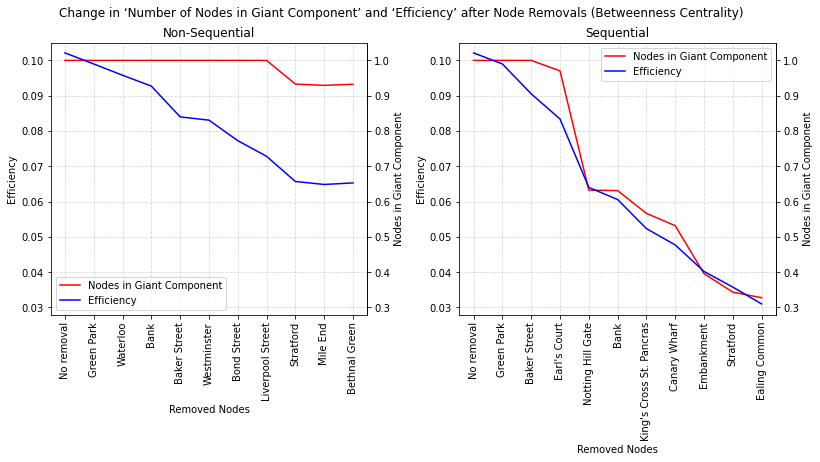

In [29]:
# Betweenness Centrality Plot
fig, ax = plt.subplots(1,2,figsize=(13,5))
fig.suptitle("Change in ‘Number of Nodes in Giant Component’ and ‘Efficiency’ after Node Removals (Betweenness Centrality)")
ax1 = ax[0]
ax2 = ax[1]
ax1.plot(betc_t_largecx, color = "red", label = 'Nodes in Giant Component',) #rang(0:10),
ax1.plot(betc_t_efficiency, color = "blue", label = 'Efficiency')#rang(0:10),
ax1.grid(color='grey', linestyle='--',alpha=0.3) #, linewidth=1
ax1.set_xlabel("Removed Nodes") # plt.xlabel("Removed node")
ax1.set_ylabel("Efficiency")   #plt.ylabel("Values")
ax1.set_ylim(0.028,0.105)
secax1 = ax1.secondary_yaxis("right", functions=(lambda x: 10*x, lambda x: 10*x))
secax1.set_ylabel("Nodes in Giant Component")
ax1.set_xticks(list(range(0,11)))
ax1.set_xticklabels(betc_t_removednode, rotation=90)# plt.xlabel("Removed node")
ax1.legend(loc=3) #'upper left' 'best'
ax1.set_title('Non-Sequential')

#Sequential
ax2.plot(betc_t_largec1x, color = "red", label = 'Nodes in Giant Component',) #rang(0:10),
ax2.plot(betc_t_efficiency1, color = "blue", label = 'Efficiency')#rang(0:10),
ax2.grid(color='grey', linestyle='--',alpha=0.3) #, linewidth=1
ax2.set_xlabel("Removed Nodes") # plt.xlabel("Removed node")
ax2.set_ylabel("Efficiency")   #plt.ylabel("Values")
ax2.set_ylim(0.028,0.105)
secax2 = ax2.secondary_yaxis("right", functions=(lambda x: 10*x, lambda x: 10*x))
secax2.set_ylabel("Nodes in Giant Component")
ax2.set_xticks(list(range(0,11)))
ax2.set_xticklabels(betc_t_removednode1, rotation=90)# plt.xlabel("Removed node")
ax2.legend(loc=1) #'upper left' 'best'
ax2.set_title('Sequential')

fig.subplots_adjust(wspace=0.29,hspace=0.0)
plt.show()

## 2Closeness Centrality

### 先复制

In [30]:
g_shp_un = g_shp.to_undirected()
print(nx.info(g_shp_un))

Name: 
Type: Graph
Number of nodes: 306
Number of edges: 353
Average degree:   2.3072


### Non-Sequencial（不重新计算）

In [31]:
cloc_t=nx.closeness_centrality(g_shp_un)
nx.set_node_attributes(g_shp_un,cloc_t,'cloc_t')

cloc_t_values=[(i[1]['cloc_t']) for i in g_shp_un.nodes(data=True)]
cloc_t_values
cloc_t_values_x=list(set(cloc_t_values))
cloc_t_values_x.sort(reverse=True)
print("原closeness centrality值数量是"+str(len(cloc_t_values))+"，去重后是"+str(len(cloc_t_values_x)))
cloc_t_values_x[0:10]

原closeness centrality值数量是306，去重后是292


[0.11548655812192352,
 0.11246312684365782,
 0.11188554658840792,
 0.11074800290486565,
 0.11070780399274047,
 0.1092406876790831,
 0.10892857142857143,
 0.10823278921220723,
 0.10713031260976466,
 0.10593956234803752]

In [32]:
#建立空list
cloc_t_removednode=['No removal']
cloc_t_largec=[]
cloc_t_efficiency=[]

#计算原始measure数值
temp_largec=lc(g_shp_un)
temp_efficiency=nx.global_efficiency(g_shp_un)
#放到表里
cloc_t_largec.append(temp_largec)
cloc_t_efficiency.append(temp_efficiency)
# 查看list内容
print(cloc_t_removednode)
print('The original largestcomponent is ' + str(temp_largec))
print('The original efficiency is ' + str(temp_efficiency))

['No removal']
The original largestcomponent is 1.0
The original efficiency is 0.1021247523344587


In [33]:
for e in range(0,10): #移除的次数是10次
    cloc_node_temp=[n for n in g_shp_un.nodes() if g_shp_un.nodes[n]['cloc_t'] == cloc_t_values_x[e]]
    print('第{0}次移除'.format(e+1)) #e+1？
#循环记录名称移除+再计算
    for i in cloc_node_temp:
        #记录名称
        cloc_t_removednode.append(g_shp_un.nodes[i]['station'])
        print(g_shp_un.nodes[i]['station'])#输出并记录站点名称
        #移除点
        g_shp_un.remove_nodes_from([i])#[i]可以吗？
        #计算measures
        temp_largec=lc(g_shp_un)
        temp_efficiency=nx.global_efficiency(g_shp_un)
        cloc_t_largec.append(temp_largec)
        cloc_t_efficiency.append(temp_efficiency)
        print('移除后的largestcomponent是 ' + str(temp_largec))
        print('移除后的efficiency是 ' + str(temp_efficiency))
cloc_t_largec = cloc_t_largec[0:11]
cloc_t_efficiency = cloc_t_efficiency[0:11]
cloc_t_removednode = cloc_t_removednode[0:11]


第1次移除
Green Park
移除后的largestcomponent是 1.0
移除后的efficiency是 0.09898423493735356
第2次移除
Westminster
移除后的largestcomponent是 1.0
移除后的efficiency是 0.09727293431029822
第3次移除
Bond Street
移除后的largestcomponent是 1.0
移除后的efficiency是 0.09627728064674146
第4次移除
Oxford Circus
移除后的largestcomponent是 1.0
移除后的efficiency是 0.09502854038843496
第5次移除
Waterloo
移除后的largestcomponent是 1.0
移除后的efficiency是 0.09304288428347293
第6次移除
Bank
移除后的largestcomponent是 1.0
移除后的efficiency是 0.08975900277323572
第7次移除
Baker Street
移除后的largestcomponent是 0.9966555183946488
移除后的efficiency是 0.07659617324132843
第8次移除
Victoria
移除后的largestcomponent是 0.5838926174496645
移除后的efficiency是 0.05908073667768008
第9次移除
Hyde Park Corner
移除后的largestcomponent是 0.5858585858585859
移除后的efficiency是 0.059187083783311424
第10次移除
Embankment
移除后的largestcomponent是 0.5844594594594594
移除后的efficiency是 0.05899028273826575


In [34]:
print(cloc_t_removednode)
print(len(cloc_t_removednode))

print(cloc_t_largec)
print(len(cloc_t_largec))

print(cloc_t_efficiency)
print(len(cloc_t_efficiency))

['No removal', 'Green Park', 'Westminster', 'Bond Street', 'Oxford Circus', 'Waterloo', 'Bank', 'Baker Street', 'Victoria', 'Hyde Park Corner', 'Embankment']
11
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9966555183946488, 0.5838926174496645, 0.5858585858585859, 0.5844594594594594]
11
[0.1021247523344587, 0.09898423493735356, 0.09727293431029822, 0.09627728064674146, 0.09502854038843496, 0.09304288428347293, 0.08975900277323572, 0.07659617324132843, 0.05908073667768008, 0.059187083783311424, 0.05899028273826575]
11


### Sequencial

In [35]:
g_shp_un = g_shp.to_undirected()
print(nx.info(g_shp_un))

Name: 
Type: Graph
Number of nodes: 306
Number of edges: 353
Average degree:   2.3072


In [36]:
# Sequential
#建立空list
cloc_t_removednode1=['No removal']
cloc_t_largec1=[]
cloc_t_efficiency1=[]

#计算原始measure数值
temp_largec=lc(g_shp_un)
temp_efficiency=nx.global_efficiency(g_shp_un)
#放到表里
cloc_t_largec1.append(temp_largec)
cloc_t_efficiency1.append(temp_efficiency)
# 查看list内容
print(cloc_t_removednode1)
print('The original largestcomponent is ' + str(temp_largec))
print('The original efficiency is ' + str(temp_efficiency))

['No removal']
The original largestcomponent is 1.0
The original efficiency is 0.1021247523344587


In [37]:
cloc_t_largec1 = cloc_t_largec1[0:11]
cloc_t_efficiency1 = cloc_t_efficiency1[0:11]
cloc_t_removednode1 = cloc_t_removednode1[0:11]


# Sequential
cloc_t=nx.closeness_centrality(g_shp_un)
nx.set_node_attributes(g_shp_un,cloc_t,'cloc_t')
cloc_t_values=[(i[1]['cloc_t']) for i in g_shp_un.nodes(data=True)]
  
for e in range(0,10):
    cloc_node_temp=[n for n in g_shp_un.nodes() if g_shp_un.nodes[n]['cloc_t'] == max(cloc_t_values)]
    print('第{0}次移除'.format(e+1)) #e+1？
     # 循环记录名称移除+再计算
    for i in cloc_node_temp:
        #记录名称
        cloc_t_removednode1.append(g_shp_un.nodes[i]['station'])
        print(g_shp_un.nodes[i]['station'])#输出并记录站点名称
        #移除点
        g_shp_un.remove_nodes_from([i])#[i]可以吗？
        #计算measures
        temp_largec=lc(g_shp_un)
        temp_efficiency=nx.global_efficiency(g_shp_un)
        cloc_t_largec1.append(temp_largec)
        cloc_t_efficiency1.append(temp_efficiency)
        print('移除后的largestcomponent是 ' + str(temp_largec))
        print('移除后的efficiency是 ' + str(temp_efficiency))
    #！先删除再计算
    cloc_t=nx.closeness_centrality(g_shp_un)
    nx.set_node_attributes(g_shp_un,cloc_t,'cloc_t')
    cloc_t_values=[(i[1]['cloc_t']) for i in g_shp_un.nodes(data=True)]
  
        
cloc_t_largec1 = cloc_t_largec1[0:11]
cloc_t_efficiency1 = cloc_t_efficiency1[0:11]
cloc_t_removednode1 = cloc_t_removednode1[0:11]

第1次移除
Green Park
移除后的largestcomponent是 1.0
移除后的efficiency是 0.09898423493735356
第2次移除
Waterloo
移除后的largestcomponent是 1.0
移除后的efficiency是 0.09579290673791988
第3次移除
King's Cross St. Pancras
移除后的largestcomponent是 0.9438943894389439
移除后的efficiency是 0.0852108828500268
第4次移除
Oxford Circus
移除后的largestcomponent是 0.9437086092715232
移除后的efficiency是 0.07845621582508722
第5次移除
Victoria
移除后的largestcomponent是 0.521594684385382
移除后的efficiency是 0.05804536594494644
第6次移除
Bank
移除后的largestcomponent是 0.52
移除后的efficiency是 0.05456571882138581
第7次移除
Paddington
移除后的largestcomponent是 0.5217391304347826
移除后的efficiency是 0.05093200721589278
第8次移除
Whitechapel
移除后的largestcomponent是 0.5167785234899329
移除后的efficiency是 0.04945176305256731
第9次移除
Stratford
移除后的largestcomponent是 0.4478114478114478
移除后的efficiency是 0.04405057235265565
第10次移除
Notting Hill Gate
移除后的largestcomponent是 0.44932432432432434
移除后的efficiency是 0.0421231423782139


In [38]:
print(cloc_t_removednode1)
print(len(cloc_t_removednode1))

print(cloc_t_largec1)
print(len(cloc_t_largec1))

print(cloc_t_efficiency1)
print(len(cloc_t_efficiency1))

['No removal', 'Green Park', 'Waterloo', "King's Cross St. Pancras", 'Oxford Circus', 'Victoria', 'Bank', 'Paddington', 'Whitechapel', 'Stratford', 'Notting Hill Gate']
11
[1.0, 1.0, 1.0, 0.9438943894389439, 0.9437086092715232, 0.521594684385382, 0.52, 0.5217391304347826, 0.5167785234899329, 0.4478114478114478, 0.44932432432432434]
11
[0.1021247523344587, 0.09898423493735356, 0.09579290673791988, 0.0852108828500268, 0.07845621582508722, 0.05804536594494644, 0.05456571882138581, 0.05093200721589278, 0.04945176305256731, 0.04405057235265565, 0.0421231423782139]
11


### Closeness Centrality Plot

In [39]:
# set to same scale
cloc_t_largecx=[i/10 for i in cloc_t_largec]
cloc_t_largec1x=[i/10 for i in cloc_t_largec1]

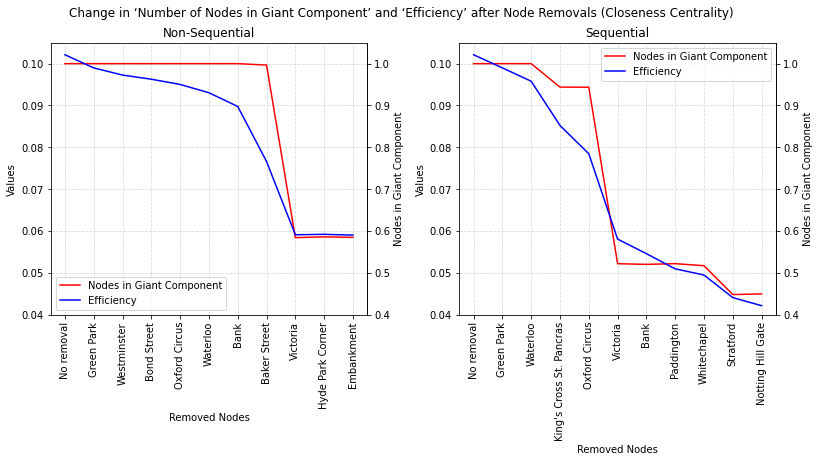

In [40]:
# Betweenness Centrality Plot
fig, ax = plt.subplots(1,2,figsize=(13,5))
fig.suptitle("Change in ‘Number of Nodes in Giant Component’ and ‘Efficiency’ after Node Removals (Closeness Centrality)")
ax1 = ax[0]
ax2 = ax[1]
#Non-Sequential
ax1.plot(cloc_t_largecx, color = "red", label = 'Nodes in Giant Component',) #rang(0:10),
ax1.plot(cloc_t_efficiency, color = "blue", label = 'Efficiency')#rang(0:10),
ax1.grid(color='grey', linestyle='--',alpha=0.3) #, linewidth=1
ax1.set_xlabel("Removed Nodes") # plt.xlabel("Removed node")
ax1.set_ylabel("Values")   #plt.ylabel("Values")
ax1.set_ylim(0.04,0.105)
secax1 = ax1.secondary_yaxis("right", functions=(lambda x: 10*x, lambda x: 10*x))
secax1.set_ylabel("Nodes in Giant Component")
ax1.set_xticks(list(range(0,11)))
ax1.set_xticklabels(cloc_t_removednode, rotation=90)# plt.xlabel("Removed node")
ax1.legend(loc=3) #'upper left' 'best'
ax1.set_title('Non-Sequential')
#Sequential
ax2.plot(cloc_t_largec1x, color = "red", label = 'Nodes in Giant Component',) #rang(0:10),
ax2.plot(cloc_t_efficiency1, color = "blue", label = 'Efficiency')#rang(0:10),
ax2.grid(color='grey', linestyle='--',alpha=0.3) #, linewidth=1
ax2.set_xlabel("Removed Nodes") # plt.xlabel("Removed node")
ax2.set_ylabel("Values")   #plt.ylabel("Values")
ax2.set_ylim(0.04,0.105)
secax2 = ax2.secondary_yaxis("right", functions=(lambda x: 10*x, lambda x: 10*x))
secax2.set_ylabel("Nodes in Giant Component")
ax2.set_xticks(list(range(0,11)))
ax2.set_xticklabels(cloc_t_removednode1, rotation=90)# plt.xlabel("Removed node")
ax2.legend(loc=1) #'upper left' 'best'
ax2.set_title('Sequential')

fig.subplots_adjust(wspace=0.29,hspace=0.0)
plt.show()

## 3Degree Centrality

### 先复制

In [41]:
g_shp_un = g_shp.to_undirected()
print(nx.info(g_shp_un))

Name: 
Type: Graph
Number of nodes: 306
Number of edges: 353
Average degree:   2.3072


In [42]:
deg=nx.degree(g_shp_un)
degxxx=list(deg)
degxxx

[(0, 7),
 (1, 2),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 4),
 (6, 2),
 (7, 5),
 (8, 3),
 (9, 2),
 (10, 6),
 (11, 2),
 (12, 2),
 (13, 2),
 (14, 1),
 (15, 2),
 (16, 2),
 (17, 2),
 (18, 2),
 (19, 2),
 (20, 2),
 (21, 2),
 (22, 2),
 (23, 2),
 (24, 6),
 (25, 6),
 (26, 5),
 (27, 2),
 (28, 2),
 (29, 2),
 (30, 2),
 (31, 2),
 (32, 4),
 (33, 4),
 (34, 2),
 (35, 2),
 (36, 2),
 (37, 3),
 (38, 2),
 (39, 4),
 (40, 2),
 (41, 2),
 (42, 2),
 (43, 2),
 (44, 2),
 (45, 2),
 (46, 2),
 (47, 2),
 (48, 3),
 (49, 2),
 (50, 1),
 (51, 2),
 (52, 2),
 (53, 2),
 (54, 2),
 (55, 2),
 (56, 2),
 (57, 2),
 (58, 4),
 (59, 2),
 (60, 4),
 (61, 2),
 (62, 2),
 (63, 2),
 (64, 2),
 (65, 3),
 (66, 4),
 (67, 2),
 (68, 2),
 (69, 2),
 (70, 2),
 (71, 1),
 (72, 2),
 (73, 2),
 (74, 3),
 (75, 2),
 (76, 2),
 (77, 2),
 (78, 2),
 (79, 4),
 (80, 2),
 (81, 2),
 (82, 2),
 (83, 2),
 (84, 2),
 (85, 2),
 (86, 4),
 (87, 2),
 (88, 7),
 (89, 3),
 (90, 3),
 (91, 3),
 (92, 2),
 (93, 4),
 (94, 2),
 (95, 3),
 (96, 4),
 (97, 2),
 (98, 2),
 (99, 2),
 (100, 3),

### Non-Sequencial（不重新计算）

In [43]:
degc_t=nx.degree_centrality(g_shp_un)
nx.set_node_attributes(g_shp_un,dict(degc_t),'degc_t') #,dict(degc_t)
list(g_shp_un.nodes(data=True))[1]

(1,
 {'station': 'Marylebone',
  'station_coord': (-0.1631, 51.5225),
  'degc_t': 0.006557377049180328})

In [44]:
degc_t_values=[(i[1]['degc_t']) for i in g_shp_un.nodes(data=True)]
degc_t_values_x=list(set(degc_t_values))
degc_t_values_x.sort(reverse=True)
print("原degree centrality值数量是"+str(len(degc_t_values))+"，去重后是"+str(len(degc_t_values_x)))
degc_t_values_x[0:10]

原degree centrality值数量是306，去重后是7


[0.022950819672131147,
 0.019672131147540982,
 0.01639344262295082,
 0.013114754098360656,
 0.009836065573770491,
 0.006557377049180328,
 0.003278688524590164]

In [45]:
# Non-sequential 

#建立空list
degc_t_removednode=['No removal']
degc_t_largec=[]
degc_t_efficiency=[]

#计算原始measure数值
temp_largec=lc(g_shp_un)
temp_efficiency=nx.global_efficiency(g_shp_un)
#放到表里
degc_t_largec.append(temp_largec)
degc_t_efficiency.append(temp_efficiency)
# 查看list内容
print(degc_t_removednode)
print('The original largestcomponent is ' + str(temp_largec))
print('The original efficiency is ' + str(temp_efficiency))

['No removal']
The original largestcomponent is 1.0
The original efficiency is 0.1021247523344587


In [46]:
for e in range(0,3): #移除的次数是3次
    degc_node_temp=[n for n in g_shp_un.nodes() if g_shp_un.nodes[n]['degc_t'] == degc_t_values_x[e]]
    print('第{0}次移除'.format(e+1)) #e+1？
# 循环记录名称移除+再计算
    for i in degc_node_temp:
        #记录名称
        degc_t_removednode.append(g_shp_un.nodes[i]['station'])
        print(g_shp_un.nodes[i]['station'])#输出并记录站点名称
        #移除点
        g_shp_un.remove_nodes_from([i])#[i]可以吗？
        #计算measures
        temp_largec=lc(g_shp_un)
        temp_efficiency=nx.global_efficiency(g_shp_un)
        degc_t_largec.append(temp_largec)
        degc_t_efficiency.append(temp_efficiency)
        print('移除后的largestcomponent是 ' + str(temp_largec))
        print('移除后的efficiency是 ' + str(temp_efficiency))
degc_t_largec = degc_t_largec[0:11]
degc_t_efficiency = degc_t_efficiency[0:11]
degc_t_removednode = degc_t_removednode[0:11]


第1次移除
Baker Street
移除后的largestcomponent是 1.0
移除后的efficiency是 0.09255207934263272
King's Cross St. Pancras
移除后的largestcomponent是 0.9375
移除后的efficiency是 0.08254382342255565
第2次移除
Waterloo
移除后的largestcomponent是 0.9372937293729373
移除后的efficiency是 0.07857408050096772
Oxford Circus
移除后的largestcomponent是 0.9337748344370861
移除后的efficiency是 0.07584604231801019
Bank
移除后的largestcomponent是 0.9335548172757475
移除后的efficiency是 0.07224360264795199
Earl's Court
移除后的largestcomponent是 0.9033333333333333
移除后的efficiency是 0.06591634887490413
Green Park
移除后的largestcomponent是 0.903010033444816
移除后的efficiency是 0.06418500235237522
第3次移除
Paddington
移除后的largestcomponent是 0.8489932885906041
移除后的efficiency是 0.05862747153320314
Liverpool Street
移除后的largestcomponent是 0.8316498316498316
移除后的efficiency是 0.05626002174356237
Turnham Green
移除后的largestcomponent是 0.7837837837837838
移除后的efficiency是 0.052010449838203035
Shadwell
移除后的largestcomponent是 0.7796610169491526
移除后的efficiency是 0.05082227676296321
Canning Town
移除后的larg

In [47]:
print(degc_t_removednode)
print(len(degc_t_removednode))

print(degc_t_largec)
print(len(degc_t_largec))

print(degc_t_efficiency)
print(len(degc_t_efficiency))

['No removal', 'Baker Street', "King's Cross St. Pancras", 'Waterloo', 'Oxford Circus', 'Bank', "Earl's Court", 'Green Park', 'Paddington', 'Liverpool Street', 'Turnham Green']
11
[1.0, 1.0, 0.9375, 0.9372937293729373, 0.9337748344370861, 0.9335548172757475, 0.9033333333333333, 0.903010033444816, 0.8489932885906041, 0.8316498316498316, 0.7837837837837838]
11
[0.1021247523344587, 0.09255207934263272, 0.08254382342255565, 0.07857408050096772, 0.07584604231801019, 0.07224360264795199, 0.06591634887490413, 0.06418500235237522, 0.05862747153320314, 0.05626002174356237, 0.052010449838203035]
11


### Sequencial

In [48]:
g_shp_un = g_shp.to_undirected()
print(nx.info(g_shp_un))

Name: 
Type: Graph
Number of nodes: 306
Number of edges: 353
Average degree:   2.3072


In [49]:
# Sequential

#建立空list
degc_t_removednode1=['No removal']
degc_t_largec1=[]
degc_t_efficiency1=[]

#计算原始measure数值
temp_largec=lc(g_shp_un)
temp_efficiency=nx.global_efficiency(g_shp_un)
#放到表里
degc_t_largec1.append(temp_largec)
degc_t_efficiency1.append(temp_efficiency)
# 查看list内容
print(degc_t_removednode1)
print('The original largestcomponent is ' + str(temp_largec))
print('The original efficiency is ' + str(temp_efficiency))

['No removal']
The original largestcomponent is 1.0
The original efficiency is 0.1021247523344587


In [50]:
# Sequential
degc_t=nx.degree_centrality(g_shp_un)
nx.set_node_attributes(g_shp_un,dict(degc_t),'degc_t')
degc_t_values=[(i[1]['degc_t']) for i in g_shp_un.nodes(data=True)]
degc_t_values

[0.022950819672131147,
 0.006557377049180328,
 0.006557377049180328,
 0.009836065573770491,
 0.013114754098360656,
 0.013114754098360656,
 0.006557377049180328,
 0.01639344262295082,
 0.009836065573770491,
 0.006557377049180328,
 0.019672131147540982,
 0.006557377049180328,
 0.006557377049180328,
 0.006557377049180328,
 0.003278688524590164,
 0.006557377049180328,
 0.006557377049180328,
 0.006557377049180328,
 0.006557377049180328,
 0.006557377049180328,
 0.006557377049180328,
 0.006557377049180328,
 0.006557377049180328,
 0.006557377049180328,
 0.019672131147540982,
 0.019672131147540982,
 0.01639344262295082,
 0.006557377049180328,
 0.006557377049180328,
 0.006557377049180328,
 0.006557377049180328,
 0.006557377049180328,
 0.013114754098360656,
 0.013114754098360656,
 0.006557377049180328,
 0.006557377049180328,
 0.006557377049180328,
 0.009836065573770491,
 0.006557377049180328,
 0.013114754098360656,
 0.006557377049180328,
 0.006557377049180328,
 0.006557377049180328,
 0.0065573770

In [51]:
for e in range(0,3):
    degc_node_temp=[n for n in g_shp_un.nodes() if g_shp_un.nodes[n]['degc_t'] == max(degc_t_values)]
    print('第{0}次移除'.format(e+1)) #e+1？
     # 循环记录名称移除+再计算
    for i in degc_node_temp:
        #记录名称
        degc_t_removednode1.append(g_shp_un.nodes[i]['station'])
        print(g_shp_un.nodes[i]['station'])#输出并记录站点名称
        #移除点
        g_shp_un.remove_nodes_from([i])#[i]可以吗？
        #计算measures
        temp_largec=lc(g_shp_un)
        temp_efficiency=nx.global_efficiency(g_shp_un)
        degc_t_largec1.append(temp_largec)
        degc_t_efficiency1.append(temp_efficiency)
        print('移除后的largestcomponent是 ' + str(temp_largec))
        print('移除后的efficiency是 ' + str(temp_efficiency))
    #！先删除再计算
    degc_t=nx.degree_centrality(g_shp_un)
    nx.set_node_attributes(g_shp_un,dict(degc_t),'degc_t')
    degc_t_values=[(i[1]['degc_t']) for i in g_shp_un.nodes(data=True)]

        
degc_t_largec1 = degc_t_largec1[0:11]
degc_t_efficiency1 = degc_t_efficiency1[0:11]
degc_t_removednode1 = degc_t_removednode1[0:11]

第1次移除
Baker Street
移除后的largestcomponent是 1.0
移除后的efficiency是 0.09255207934263272
King's Cross St. Pancras
移除后的largestcomponent是 0.9375
移除后的efficiency是 0.08254382342255565
第2次移除
Waterloo
移除后的largestcomponent是 0.9372937293729373
移除后的efficiency是 0.07857408050096772
Oxford Circus
移除后的largestcomponent是 0.9337748344370861
移除后的efficiency是 0.07584604231801019
Bank
移除后的largestcomponent是 0.9335548172757475
移除后的efficiency是 0.07224360264795199
Earl's Court
移除后的largestcomponent是 0.9033333333333333
移除后的efficiency是 0.06591634887490413
Green Park
移除后的largestcomponent是 0.903010033444816
移除后的efficiency是 0.06418500235237522
第3次移除
Paddington
移除后的largestcomponent是 0.8489932885906041
移除后的efficiency是 0.05862747153320314
Turnham Green
移除后的largestcomponent是 0.8013468013468014
移除后的efficiency是 0.05435589203339149
Canning Town
移除后的largestcomponent是 0.7601351351351351
移除后的efficiency是 0.04888131710370269


In [52]:
print(degc_t_removednode1)
print(len(degc_t_removednode1))

print(degc_t_largec1)
print(len(degc_t_largec1))

print(degc_t_efficiency1)
print(len(degc_t_efficiency1))

['No removal', 'Baker Street', "King's Cross St. Pancras", 'Waterloo', 'Oxford Circus', 'Bank', "Earl's Court", 'Green Park', 'Paddington', 'Turnham Green', 'Canning Town']
11
[1.0, 1.0, 0.9375, 0.9372937293729373, 0.9337748344370861, 0.9335548172757475, 0.9033333333333333, 0.903010033444816, 0.8489932885906041, 0.8013468013468014, 0.7601351351351351]
11
[0.1021247523344587, 0.09255207934263272, 0.08254382342255565, 0.07857408050096772, 0.07584604231801019, 0.07224360264795199, 0.06591634887490413, 0.06418500235237522, 0.05862747153320314, 0.05435589203339149, 0.04888131710370269]
11


### Degree Centrality Plot

In [53]:
# set to same scale
degc_t_largecx=[i/10 for i in degc_t_largec]
degc_t_largec1x=[i/10 for i in degc_t_largec1]

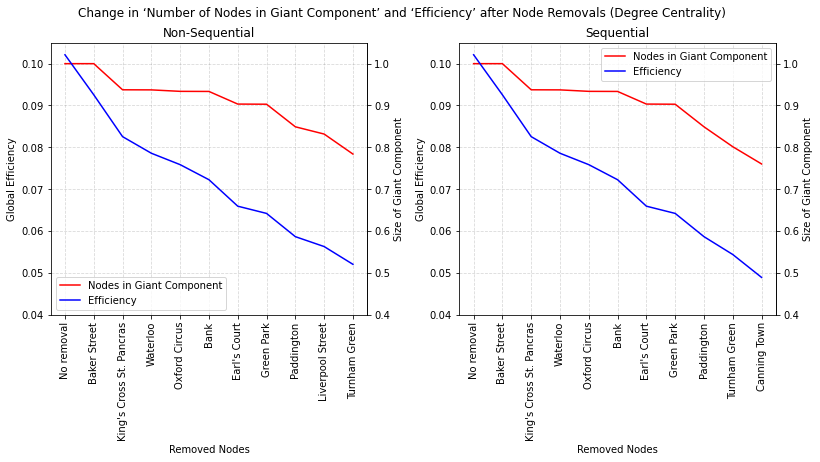

In [54]:
# Degree Centrality Plot
fig, ax = plt.subplots(1,2,figsize=(13,5))
fig.suptitle("Change in ‘Number of Nodes in Giant Component’ and ‘Efficiency’ after Node Removals (Degree Centrality)")
ax1 = ax[0]
ax2 = ax[1]
#Non-Sequential
ax1.plot(degc_t_largecx, color = "red", label = 'Nodes in Giant Component',) #rang(0:10),
ax1.plot(degc_t_efficiency, color = "blue", label = 'Efficiency')#rang(0:10),
ax1.grid(color='grey', linestyle='--',alpha=0.3) #, linewidth=1
ax1.set_xlabel("Removed Nodes") # plt.xlabel("Removed node")
ax1.set_ylabel("Global Efficiency")   #plt.ylabel("Values")
ax1.set_ylim(0.04,0.105)
secax1 = ax1.secondary_yaxis("right", functions=(lambda x: 10*x, lambda x: 10*x))
secax1.set_ylabel("Size of Giant Component")
ax1.set_xticks(list(range(0,11)))
ax1.set_xticklabels(degc_t_removednode, rotation=90)# plt.xlabel("Removed node")
ax1.legend(loc=3) #'upper left' 'best'
ax1.set_title('Non-Sequential')

#Sequential
ax2.plot(degc_t_largec1x, color = "red", label = 'Nodes in Giant Component',) #rang(0:10),
ax2.plot(degc_t_efficiency1, color = "blue", label = 'Efficiency')#rang(0:10),
ax2.grid(color='grey', linestyle='--',alpha=0.3) #, linewidth=1
ax2.set_xlabel("Removed Nodes") # plt.xlabel("Removed node")
ax2.set_ylabel("Global Efficiency")   #plt.ylabel("Values")
ax2.set_ylim(0.04,0.105)
secax2 = ax2.secondary_yaxis("right", functions=(lambda x: 10*x, lambda x: 10*x))
secax2.set_ylabel("Size of Giant Component")
ax2.set_xticks(list(range(0,11)))
ax2.set_xticklabels(degc_t_removednode1, rotation=90)# plt.xlabel("Removed node")
ax2.legend(loc=1) #'upper left' 'best'
ax2.set_title('Sequential')

fig.subplots_adjust(wspace=0.29,hspace=0.0)
plt.show()

## 空间图

In [55]:
# print(betc_t_removednode)
# print(betc_t_removednode1)

# print(cloc_t_removednode)
# print(cloc_t_removednode1)

# print(degc_t_removednode)
# print(degc_t_removednode1)

In [56]:
g_shp_un = g_shp.to_undirected()
print(nx.info(g_shp_un))
list(g_shp_un.edges(data=True))[0:3]

Name: 
Type: Graph
Number of nodes: 306
Number of edges: 353
Average degree:   2.3072


[(0,
  1,
  {'toid_seq': '1',
   'station_1': 11,
   'station_1_': 'Baker Street',
   'station_2': 163,
   'station_2_': 'Marylebone',
   'distance': 416.586050414,
   'ShpName': 'underground'}),
 (0,
  2,
  {'toid_seq': '2',
   'station_1': 11,
   'station_1_': 'Baker Street',
   'station_2': 212,
   'station_2_': "Regent's Park",
   'distance': 734.173636158,
   'ShpName': 'underground'}),
 (0,
  75,
  {'toid_seq': '171',
   'station_1': 11,
   'station_1_': 'Baker Street',
   'station_2': 83,
   'station_2_': 'Edgware Road (C)',
   'distance': 931.21157741,
   'ShpName': 'underground'})]

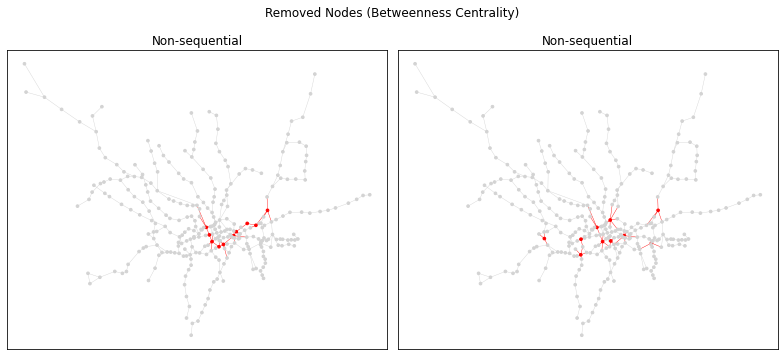

In [57]:
#BETWEENNESS
#
colorebn=[]
colornbn=[]
for n in g_shp_un.nodes():
    nnnn=g_shp_un.nodes[n]['station']
    if nnnn in list(betc_t_removednode):
        colornbn.append('red')
    else:
        colornbn.append('lightgrey')
for e in g_shp_un.edges():
    nnnn1=g_shp_un.edges[e]['station_1_']
    nnnn2=g_shp_un.edges[e]['station_2_']
    if nnnn1 in list(betc_t_removednode):
        colorebn.append('red')
    elif nnnn2 in list(betc_t_removednode):
        colorebn.append('red')
    else:
        colorebn.append('lightgrey')
        
#
colorebs=[]
colornbs=[]
for n in g_shp_un.nodes():
    nnnn=g_shp_un.nodes[n]['station']
    if nnnn in list(betc_t_removednode1):
        colornbs.append('red')
    else:
        colornbs.append('lightgrey')
for e in g_shp_un.edges():
    nnnn1=g_shp_un.edges[e]['station_1_']
    nnnn2=g_shp_un.edges[e]['station_2_']
    if nnnn1 in list(betc_t_removednode1):
        colorebs.append('red')
    elif nnnn2 in list(betc_t_removednode1):
        colorebs.append('red')
    else:
        colorebs.append('lightgrey')

#
fig, ax = plt.subplots(1,2,figsize=(11,5))
fig.suptitle("Removed Nodes (Betweenness Centrality)")
ax1 = ax[0]
ax2 = ax[1]
#ax1
nx.draw_networkx_edges(g_shp_un, pos,edge_color=colorebn, width=0.4,ax=ax1)
nx.draw_networkx_nodes(g_shp_un, pos = pos, node_color= colornbn,node_size= 7,ax= ax1)
# ax1.set_axis_off()
ax1.set_title("Non-sequential") #,fontsize=15

#ax2
nx.draw_networkx_edges(g_shp_un, pos,edge_color=colorebs, width=0.4,ax=ax2)
nx.draw_networkx_nodes(g_shp_un, pos = pos, node_color= colornbs,node_size= 7,ax= ax2)
# ax2.set_axis_off()
ax2.set_title("Non-sequential") #,fontsize=15

#fig.subplots_adjust(wspace=0.29,hspace=0.0)
fig.tight_layout()
plt.show()

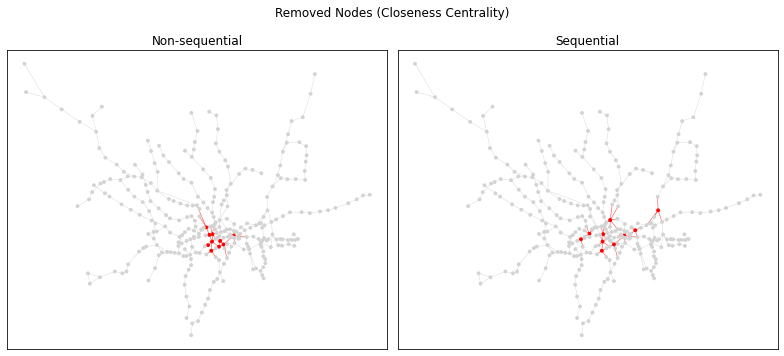

In [58]:
#CLOSENESS
#
colorecn=[]
colorncn=[]
for n in g_shp_un.nodes():
    nnnn=g_shp_un.nodes[n]['station']
    if nnnn in list(cloc_t_removednode):
        colorncn.append('red')
    else:
        colorncn.append('lightgrey')
for e in g_shp_un.edges():
    nnnn1=g_shp_un.edges[e]['station_1_']
    nnnn2=g_shp_un.edges[e]['station_2_']
    if nnnn1 in list(cloc_t_removednode):
        colorecn.append('red')
    elif nnnn2 in list(cloc_t_removednode):
        colorecn.append('red')
    else:
        colorecn.append('lightgrey')
        
#
colorecs=[]
colorncs=[]
for n in g_shp_un.nodes():
    nnnn=g_shp_un.nodes[n]['station']
    if nnnn in list(cloc_t_removednode1):
        colorncs.append('red')
    else:
        colorncs.append('lightgrey')
for e in g_shp_un.edges():
    nnnn1=g_shp_un.edges[e]['station_1_']
    nnnn2=g_shp_un.edges[e]['station_2_']
    if nnnn1 in list(cloc_t_removednode1):
        colorecs.append('red')
    elif nnnn2 in list(cloc_t_removednode1):
        colorecs.append('red')
    else:
        colorecs.append('lightgrey')

#
fig, ax = plt.subplots(1,2,figsize=(11,5))
fig.suptitle("Removed Nodes (Closeness Centrality)")
ax1 = ax[0]
ax2 = ax[1]
#ax1
nx.draw_networkx_edges(g_shp_un, pos,edge_color=colorecn, width=0.4,ax=ax1)
nx.draw_networkx_nodes(g_shp_un, pos = pos, node_color= colorncn,node_size= 8,ax= ax1)
# ax1.set_axis_off()
ax1.set_title("Non-sequential") #,fontsize=15

#ax2
nx.draw_networkx_edges(g_shp_un, pos,edge_color=colorecs, width=0.4,ax=ax2)
nx.draw_networkx_nodes(g_shp_un, pos = pos, node_color= colorncs,node_size= 8,ax= ax2)
# ax2.set_axis_off()
ax2.set_title("Sequential") #,fontsize=15

#fig.subplots_adjust(wspace=0.29,hspace=0.0)
fig.tight_layout()
plt.show()

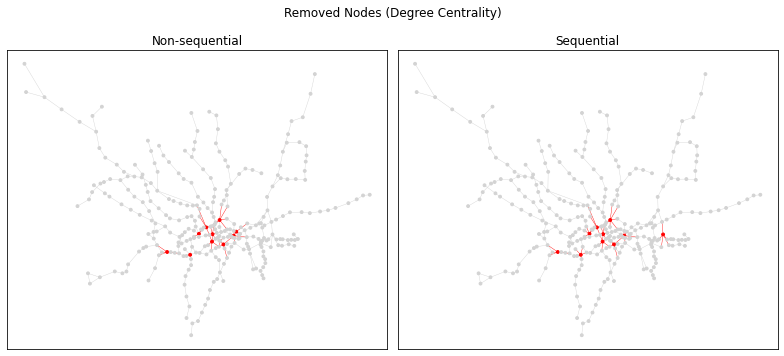

In [59]:
#DEGREE
#
coloredn=[]
colorndn=[]
for n in g_shp_un.nodes():
    nnnn=g_shp_un.nodes[n]['station']
    if nnnn in list(degc_t_removednode):
        colorndn.append('red')
    else:
        colorndn.append('lightgrey')
for e in g_shp_un.edges():
    nnnn1=g_shp_un.edges[e]['station_1_']
    nnnn2=g_shp_un.edges[e]['station_2_']
    if nnnn1 in list(cloc_t_removednode):
        coloredn.append('red')
    elif nnnn2 in list(degc_t_removednode):
        coloredn.append('red')
    else:
        coloredn.append('lightgrey')

#
coloreds=[]
colornds=[]
for n in g_shp_un.nodes():
    nnnn=g_shp_un.nodes[n]['station']
    if nnnn in list(degc_t_removednode1):
        colornds.append('red')
    else:
        colornds.append('lightgrey')
for e in g_shp_un.edges():
    nnnn1=g_shp_un.edges[e]['station_1_']
    nnnn2=g_shp_un.edges[e]['station_2_']
    if nnnn1 in list(degc_t_removednode1):
        coloreds.append('red')
    elif nnnn2 in list(degc_t_removednode1):
        coloreds.append('red')
    else:
        coloreds.append('lightgrey')

#
fig, ax = plt.subplots(1,2,figsize=(11,5))
fig.suptitle("Removed Nodes (Degree Centrality)")
ax1 = ax[0]
ax2 = ax[1]
#ax1
nx.draw_networkx_edges(g_shp_un, pos,edge_color=coloredn, width=0.4,ax=ax1)
nx.draw_networkx_nodes(g_shp_un, pos = pos, node_color= colorndn,node_size= 8,ax= ax1)
#ax1.set_axis_off()
ax1.set_title("Non-sequential") #,fontsize=15

#ax2
nx.draw_networkx_edges(g_shp_un, pos,edge_color=coloreds, width=0.4,ax=ax2)
nx.draw_networkx_nodes(g_shp_un, pos = pos, node_color= colornds,node_size= 8,ax= ax2)
#ax2.set_axis_off()
ax2.set_title("Sequential") #,fontsize=15

#fig.subplots_adjust(wspace=0.29,hspace=0.0)
fig.tight_layout()
plt.show()

In [60]:
# # Three Centralitys Plot
# fig, ax = plt.subplots(1,1,figsize=(10,5))
# fig.suptitle("Change in ‘Efficiency’ after Sequential Node Removals") # "Change in ‘Number of Nodes in Giant Component’ and ‘Efficiency’ after Node Removals (Degree Centrality)
# ax.plot(betc_w_efficiency1, color = "blue", label = 'Betweenness Centrality')#rang(0:10),
# ax.plot(cloc_w_efficiency1, color = "green", label = 'Closeness Centrality')#rang(0:10),
# ax.plot(degc_w_efficiency1, color = "red", label = 'Degree Centrality')#rang(0:10),
# ax.grid(color='grey', linestyle='--',alpha=0.3) #, linewidth=1
# ax.set_xlabel("Number of Removed Nodes") # plt.xlabel("Removed node")
# ax.set_ylabel("Efficiency Values")   #plt.ylabel("Values")
# ax.set_ylim(0.025,0.09)
# ax.set_xticks(list(range(0,11)))
# # ax.set_xticklabels(betc_t_removednode, rotation=90)# plt.xlabel("Removed node")
# ax.legend(loc=1) #'upper left' 'best'
# ax.set_title('(Sequential, with Flow)')

# plt.show()

# Part 2

## Preparation for Part 2

In [61]:
orig_dest = pd.read_csv("ODtube2017.csv")
orig_dest.head()

,From,station_name,To,station_name1,total_wtrips
0,500,Acton Town,505,Alperton,143
1,500,Acton Town,506,Amersham,22
2,500,Acton Town,507,Angel,15
3,500,Acton Town,508,Archway,9
4,500,Acton Town,510,Arsenal,9


## Part 2.1
### Part 2.1.1

In [62]:
inflow = orig_dest.groupby('station_name1')['total_wtrips'].sum().to_dict()
outflow = orig_dest.groupby('station_name')['total_wtrips'].sum().to_dict()
# inflow

In [63]:
#Check whether all in place
print(betc_t_removednode)
print(len(betc_t_removednode))
print(betc_t_removednode1)
print(len(betc_t_removednode1))
print(cloc_t_removednode)
print(len(cloc_t_removednode))
print(cloc_t_removednode1)
print(len(cloc_t_removednode1))
print(degc_t_removednode)
print(len(degc_t_removednode))
print(degc_t_removednode1)
print(len(degc_t_removednode1))

['No removal', 'Green Park', 'Waterloo', 'Bank', 'Baker Street', 'Westminster', 'Bond Street', 'Liverpool Street', 'Stratford', 'Mile End', 'Bethnal Green']
11
['No removal', 'Green Park', 'Baker Street', "Earl's Court", 'Notting Hill Gate', 'Bank', "King's Cross St. Pancras", 'Canary Wharf', 'Embankment', 'Stratford', 'Ealing Common']
11
['No removal', 'Green Park', 'Westminster', 'Bond Street', 'Oxford Circus', 'Waterloo', 'Bank', 'Baker Street', 'Victoria', 'Hyde Park Corner', 'Embankment']
11
['No removal', 'Green Park', 'Waterloo', "King's Cross St. Pancras", 'Oxford Circus', 'Victoria', 'Bank', 'Paddington', 'Whitechapel', 'Stratford', 'Notting Hill Gate']
11
['No removal', 'Baker Street', "King's Cross St. Pancras", 'Waterloo', 'Oxford Circus', 'Bank', "Earl's Court", 'Green Park', 'Paddington', 'Liverpool Street', 'Turnham Green']
11
['No removal', 'Baker Street', "King's Cross St. Pancras", 'Waterloo', 'Oxford Circus', 'Bank', "Earl's Court", 'Green Park', 'Paddington', 'Turnh

In [64]:
# Betweenness Centrality
print("Betweenness Centrality") 
betc_t_reducedinflow=[0]
betc_t_reducedoutflow=[0]
betc_t_reducedinflow1=[0]
betc_t_reducedoutflow1=[0]

for i in betc_t_removednode[1:11]:
    temp_inflow = inflow[i]
    temp_outflow = outflow[i]
    betc_t_reducedinflow.append(temp_inflow + max(betc_t_reducedinflow))
    betc_t_reducedoutflow.append(temp_outflow + max(betc_t_reducedoutflow))
print("Non-Sequential:\n" + str(betc_t_reducedinflow) + "\n" + str(betc_t_reducedoutflow))

for i in betc_t_removednode1[1:11]:
    temp_inflow = inflow[i]
    temp_outflow = outflow[i]
    betc_t_reducedinflow1.append(temp_inflow + max(betc_t_reducedinflow1))
    betc_t_reducedoutflow1.append(temp_outflow + max(betc_t_reducedoutflow1))
print("Sequential:\n" + str(betc_t_reducedinflow1) + "\n" + str(betc_t_reducedoutflow1))

# Closeness Centrality
print("Closeness Centrality") 
cloc_t_reducedinflow=[0]
cloc_t_reducedoutflow=[0]
cloc_t_reducedinflow1=[0]
cloc_t_reducedoutflow1=[0]

for i in cloc_t_removednode[1:11]:
    temp_inflow = inflow[i]
    temp_outflow = outflow[i]
    cloc_t_reducedinflow.append(temp_inflow + max(cloc_t_reducedinflow))
    cloc_t_reducedoutflow.append(temp_outflow + max(cloc_t_reducedoutflow))
print("Non-Sequential:\n" + str(cloc_t_reducedinflow) + "\n" + str(cloc_t_reducedoutflow))

for i in cloc_t_removednode1[1:11]:
    temp_inflow = inflow[i]
    temp_outflow = outflow[i]
    cloc_t_reducedinflow1.append(temp_inflow + max(cloc_t_reducedinflow1))
    cloc_t_reducedoutflow1.append(temp_outflow + max(cloc_t_reducedoutflow1))
print("Sequential:\n" + str(cloc_t_reducedinflow1) + "\n" + str(cloc_t_reducedoutflow1))

# Degree Centrality
print("Degree Centrality") 
degc_t_reducedinflow=[0]
degc_t_reducedoutflow=[0]
degc_t_reducedinflow1=[0]
degc_t_reducedoutflow1=[0]

for i in degc_t_removednode[1:11]:
    temp_inflow = inflow[i]
    temp_outflow = outflow[i]
    degc_t_reducedinflow.append(temp_inflow + max(degc_t_reducedinflow))
    degc_t_reducedoutflow.append(temp_outflow + max(degc_t_reducedoutflow))
print("Non-Sequential:\n" + str(degc_t_reducedinflow) + "\n" + str(degc_t_reducedoutflow))

for i in degc_t_removednode1[1:11]:
    temp_inflow = inflow[i]
    temp_outflow = outflow[i]
    degc_t_reducedinflow1.append(temp_inflow + max(degc_t_reducedinflow1))
    degc_t_reducedoutflow1.append(temp_outflow + max(degc_t_reducedoutflow1))
print("Sequential:\n" + str(degc_t_reducedinflow) + "\n" + str(degc_t_reducedoutflow1))

Betweenness Centrality
Non-Sequential:
[0, 45367, 132676, 232673, 259509, 283673, 319855, 393556, 461352, 473002, 484474]
[0, 27042, 121555, 201143, 225955, 244696, 272582, 336738, 421204, 435547, 448616]
Sequential:
[0, 45367, 72203, 87342, 100153, 200150, 281519, 349636, 371449, 439245, 442194]
[0, 27042, 51854, 68541, 81664, 161252, 238407, 291614, 307575, 392041, 395450]
Closeness Centrality
Non-Sequential:
[0, 45367, 69531, 105713, 185732, 273041, 373038, 399874, 470545, 475162, 496975]
[0, 27042, 45783, 73669, 121291, 215804, 295392, 320204, 384745, 388147, 404108]
Sequential:
[0, 45367, 132676, 214045, 294064, 364735, 464732, 511811, 533935, 601731, 614542]
[0, 27042, 121555, 198710, 246332, 310873, 390461, 435263, 456742, 541208, 554331]
Degree Centrality
Non-Sequential:
[0, 26836, 108205, 195514, 275533, 375530, 390669, 436036, 483115, 556816, 562067]
[0, 24812, 101967, 196480, 244102, 323690, 340377, 367419, 412221, 476377, 482689]
Sequential:
[0, 26836, 108205, 195514, 27553

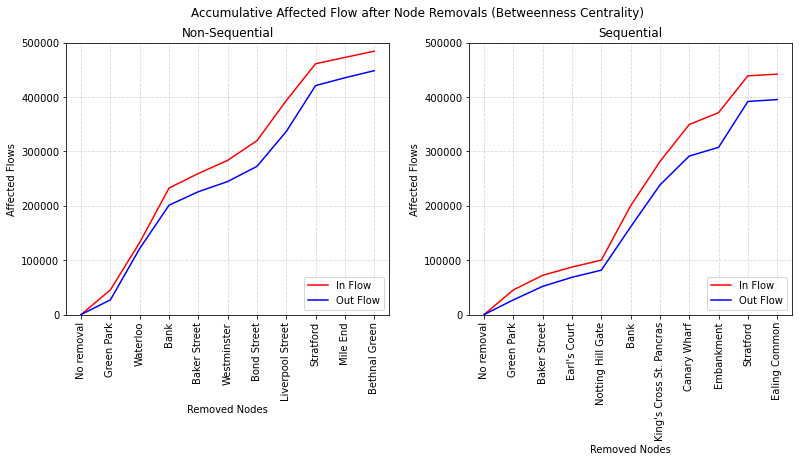

In [65]:
# Betweenness Centrality Plot
fig, ax = plt.subplots(1,2,figsize=(13,5))
fig.suptitle("Accumulative Affected Flow after Node Removals (Betweenness Centrality)")
ax1 = ax[0]
ax2 = ax[1]
#Non-Sequential
ax1.plot(betc_t_reducedinflow, color = "red", label = 'In Flow',)
ax1.plot(betc_t_reducedoutflow, color = "blue", label = 'Out Flow')
ax1.grid(color='grey', linestyle='--',alpha=0.3)
ax1.set_xlabel("Removed Nodes")
ax1.set_ylabel("Affected Flows") 
ax1.set_ylim(0,500_000)
ax1.set_xticks(list(range(0,11)))
ax1.set_xticklabels(betc_t_removednode, rotation=90)
ax1.legend(loc=4) 
ax1.set_title('Non-Sequential')
#Sequential
ax2.plot(betc_t_reducedinflow1, color = "red", label = 'In Flow',)
ax2.plot(betc_t_reducedoutflow1, color = "blue", label = 'Out Flow')
ax2.grid(color='grey', linestyle='--',alpha=0.3)
ax2.set_xlabel("Removed Nodes")
ax2.set_ylabel("Affected Flows") 
ax2.set_ylim(0,500_000)
ax2.set_xticks(list(range(0,11)))
ax2.set_xticklabels(betc_t_removednode1, rotation=90)
ax2.legend(loc=4) 
ax2.set_title('Sequential')

fig.subplots_adjust(wspace=0.25,hspace=0.0)
plt.show()

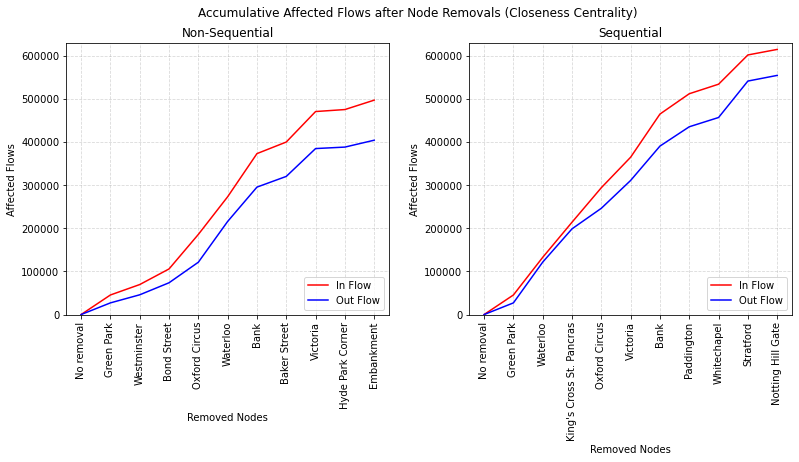

In [66]:
# Closeness Centrality Plot
fig, ax = plt.subplots(1,2,figsize=(13,5))
fig.suptitle("Accumulative Affected Flows after Node Removals (Closeness Centrality)")
ax1 = ax[0]
ax2 = ax[1]
#Non-Sequential
ax1.plot(cloc_t_reducedinflow, color = "red", label = 'In Flow',)
ax1.plot(cloc_t_reducedoutflow, color = "blue", label = 'Out Flow')
ax1.grid(color='grey', linestyle='--',alpha=0.3)
ax1.set_xlabel("Removed Nodes")
ax1.set_ylabel("Affected Flows") 
ax1.set_ylim(0,630_000)
ax1.set_xticks(list(range(0,11)))
ax1.set_xticklabels(cloc_t_removednode, rotation=90)
ax1.legend(loc=4) 
ax1.set_title('Non-Sequential')
#Sequential
ax2.plot(cloc_t_reducedinflow1, color = "red", label = 'In Flow',)
ax2.plot(cloc_t_reducedoutflow1, color = "blue", label = 'Out Flow')
ax2.grid(color='grey', linestyle='--',alpha=0.3)
ax2.set_xlabel("Removed Nodes")
ax2.set_ylabel("Affected Flows") 
ax2.set_ylim(0,630_000)
ax2.set_xticks(list(range(0,11)))
ax2.set_xticklabels(cloc_t_removednode1, rotation=90)
ax2.legend(loc=4) 
ax2.set_title('Sequential')

fig.subplots_adjust(wspace=0.25,hspace=0.0)
plt.show()

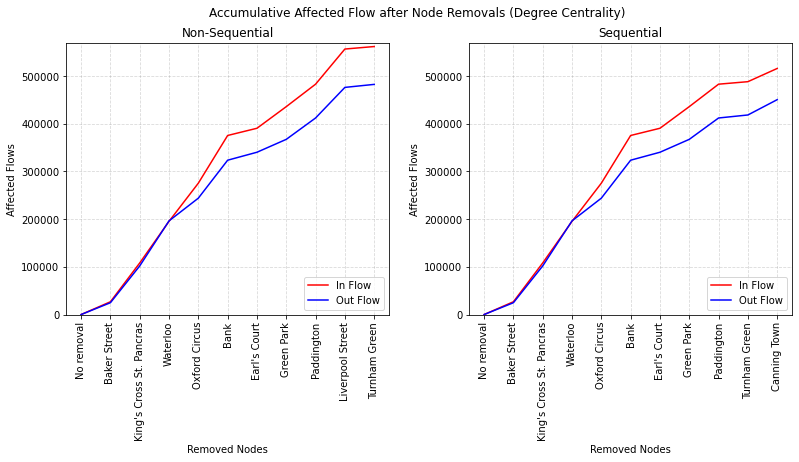

In [67]:
# Degree Centrality Plot
fig, ax = plt.subplots(1,2,figsize=(13,5))
fig.suptitle("Accumulative Affected Flow after Node Removals (Degree Centrality)")
ax1 = ax[0]
ax2 = ax[1]
#Non-Sequential
ax1.plot(degc_t_reducedinflow, color = "red", label = 'In Flow',)
ax1.plot(degc_t_reducedoutflow, color = "blue", label = 'Out Flow')
ax1.grid(color='grey', linestyle='--',alpha=0.3)
ax1.set_xlabel("Removed Nodes")
ax1.set_ylabel("Affected Flows") 
ax1.set_ylim(0,570_000)
ax1.set_xticks(list(range(0,11)))
ax1.set_xticklabels(degc_t_removednode, rotation=90)
ax1.legend(loc=4) 
ax1.set_title('Non-Sequential')
#Sequential
ax2.plot(degc_t_reducedinflow1, color = "red", label = 'In Flow',)
ax2.plot(degc_t_reducedoutflow1, color = "blue", label = 'Out Flow')
ax2.grid(color='grey', linestyle='--',alpha=0.3)
ax2.set_xlabel("Removed Nodes")
ax2.set_ylabel("Affected Flows") 
ax2.set_ylim(0,570_000)
ax2.set_xticks(list(range(0,11)))
ax2.set_xticklabels(degc_t_removednode1, rotation=90)
ax2.legend(loc=4) 
ax2.set_title('Sequential')

fig.subplots_adjust(wspace=0.25,hspace=0.0)
plt.show()

### Part 2.1.2 

**g_OD**

In [68]:
g_shp_un = g_shp.to_undirected()
print(nx.info(g_shp_un))

Name: 
Type: Graph
Number of nodes: 306
Number of edges: 353
Average degree:   2.3072


In [69]:
list(g_shp_un.nodes(data=True))[0:3]

[(0, {'station': 'Baker Street', 'station_coord': (-0.1571, 51.5226)}),
 (1, {'station': 'Marylebone', 'station_coord': (-0.1631, 51.5225)}),
 (2, {'station': "Regent's Park", 'station_coord': (-0.1466, 51.5234)})]

In [70]:
g_OD = nx.from_pandas_edgelist(orig_dest, 'station_name', 'station_name1',['total_wtrips'],create_using= nx.DiGraph)
# nx.draw(g_OD, node_color='b', node_size=8, edge_color='gray', width=0.4)

In [71]:
g_OD_edgelist=list(g_OD.edges(data=True))
g_OD_edgelist[0:10]

[('Acton Town', 'Alperton', {'total_wtrips': 143}),
 ('Acton Town', 'Amersham', {'total_wtrips': 22}),
 ('Acton Town', 'Angel', {'total_wtrips': 15}),
 ('Acton Town', 'Archway', {'total_wtrips': 9}),
 ('Acton Town', 'Arsenal', {'total_wtrips': 9}),
 ('Acton Town', 'Baker Street', {'total_wtrips': 19}),
 ('Acton Town', 'Bank', {'total_wtrips': 226}),
 ('Acton Town', 'Barbican', {'total_wtrips': 7}),
 ('Acton Town', 'Barons Court', {'total_wtrips': 36}),
 ('Acton Town', 'Bayswater', {'total_wtrips': 2})]

In [72]:
#1.Copy name as an attribute:
nod_names={(e1):e1 for e1 in g_OD.nodes()}
nx.set_node_attributes(g_OD,nod_names,'station') #with nod_id1 or nod_id2 is enought
list(g_OD.nodes(data=True))[:10]

[('Acton Town', {'station': 'Acton Town'}),
 ('Alperton', {'station': 'Alperton'}),
 ('Amersham', {'station': 'Amersham'}),
 ('Angel', {'station': 'Angel'}),
 ('Archway', {'station': 'Archway'}),
 ('Arsenal', {'station': 'Arsenal'}),
 ('Baker Street', {'station': 'Baker Street'}),
 ('Bank', {'station': 'Bank'}),
 ('Barbican', {'station': 'Barbican'}),
 ('Barons Court', {'station': 'Barons Court'})]

In [73]:
mapping = {g_shp_un.nodes[i]['station']:i for i in g_shp_un.nodes()} #mapping is a list
g_OD = nx.relabel_nodes(g_OD, mapping)
print(list(g_OD.nodes(data=True))[:10])

[(111, {'station': 'Acton Town'}), (238, {'station': 'Alperton'}), (172, {'station': 'Amersham'}), (196, {'station': 'Angel'}), (198, {'station': 'Archway'}), (244, {'station': 'Arsenal'}), (0, {'station': 'Baker Street'}), (25, {'station': 'Bank'}), (77, {'station': 'Barbican'}), (100, {'station': 'Barons Court'})]


**g_flows**

In [74]:
N=len(g_shp_un.nodes())
adj_c=np.zeros((N, N)) 
# print (adj_c.ndim)
# print (adj_c.size)
# print (adj_c.shape)
# print (adj_c.dtype)

In [75]:
for e1,e2,C in g_OD.edges(data='total_wtrips'):
    path = nx.dijkstra_path(g_shp_un,e1,e2)  #shortest path e1,e2 taking into account distance weights in g_shp_un
    path_edges = list(zip(path,path[1:])) #list of tuples with shortest path edges [(e1,s2),(s3,s4),...,(s(n-1),e2)]
    for (s1,s2) in path_edges:
            adj_c[s1,s2]=adj_c[s1,s2]+C #sum the contribution of the OD flow to all edges in the shortest path
print(adj_c)

[[    0. 15400. 36470. ...     0.     0.     0.]
 [15035.     0.     0. ...     0.     0.     0.]
 [19675.     0.     0. ...     0.     0.     0.]
 ...
 [    0.     0.     0. ...     0.     0.     0.]
 [    0.     0.     0. ...     0.     0.     0.]
 [    0.     0.     0. ...     0.     0.     0.]]


In [76]:
g_flows = nx.from_numpy_matrix(adj_c, create_using=nx.DiGraph)

In [77]:
print(nx.info(g_flows))

Name: 
Type: DiGraph
Number of nodes: 306
Number of edges: 623
Average in degree:   2.0359
Average out degree:   2.0359


In [78]:
#set names and coords for the gflow nodes
nod_coord = {(e1):coord for e1,coord in g_shp_un.nodes(data='station_coord')}
nod_names = {(e1):name for e1,name in g_shp_un.nodes(data='station')}
nx.set_node_attributes(g_flows,nod_coord,'station_coord')
nx.set_node_attributes(g_flows,nod_names,'station')

In [79]:
v_weights={(e1, e2):round(1./weight,7) for e1, e2, weight in g_flows.edges(data='weight')}
nx.set_edge_attributes(g_flows, v_weights, 'v_weights')

In [80]:
list(g_flows.edges(data = True))[0:3]

[(0, 1, {'weight': 15400.0, 'v_weights': 6.49e-05}),
 (0, 2, {'weight': 36470.0, 'v_weights': 2.74e-05}),
 (0, 33, {'weight': 122139.0, 'v_weights': 8.2e-06})]

In [81]:
list(g_flows.nodes(data=True))[0:3]

[(0, {'station_coord': (-0.1571, 51.5226), 'station': 'Baker Street'}),
 (1, {'station_coord': (-0.1631, 51.5225), 'station': 'Marylebone'}),
 (2, {'station_coord': (-0.1466, 51.5234), 'station': "Regent's Park"})]

####  Plot graph

In [82]:
# betweenness_centrality
betc_w = nx.betweenness_centrality(g_flows, weight='v_weights', normalized=False)  # v_weights 是Flow倒数值
nx.set_node_attributes(g_flows,betc_w,'betc_w')
betc_w_values=[(i[1]['betc_w']) for i in g_flows.nodes(data=True)]
betc_w_color=[(i[1]['betc_w']/max(betc_w_values)) for i in g_flows.nodes(data=True)]
betc_w_size=[(i[1]['betc_w']/max(betc_w_values)*100) for i in g_flows.nodes(data=True)]

# closeness_centrality
cloc_w = nx.closeness_centrality(g_flows, distance='v_weights') # v_weights 是Flow倒数值
nx.set_node_attributes(g_flows,cloc_w,'cloc_w')
cloc_w_values=[(i[1]['cloc_w']) for i in g_flows.nodes(data=True)]
cloc_w_color=[(i[1]['cloc_w']-min(cloc_w_values))*2/(max(cloc_w_values)-min(cloc_w_values)) for i in g_flows.nodes(data=True)]
cloc_w_size=[((i[1]['cloc_w']-min(cloc_w_values))/(max(cloc_w_values)-min(cloc_w_values))*33) for i in g_flows.nodes(data=True)]

# degree_centrality
degc_w = nx.degree(g_flows,weight='weight')   #'v_weights' 这里用的weight 不取倒数
#degc_w = nx.in_degree(g_flows,weight='v_weights')  #!!!!'v_weights'
#degc_w = nx.degree_centrality(g_flows)  # !!!!无法体现Flow
nx.set_node_attributes(g_flows,dict(degc_w),'degc_w')
degc_w_values=[(i[1]['degc_w']) for i in g_flows.nodes(data=True)]
degc_w_color=[(i[1]['degc_w']*1.5) for i in g_flows.nodes(data=True)]
degc_w_size=[(i[1]['degc_w']*0.00005) for i in g_flows.nodes(data=True)]

In [83]:
# Plot graph
'''
pos={e1: xy for e1,xy in g_flows.nodes(data='station_coord')}

# betweenness_centrality
fig, ax = plt.subplots(figsize=(12,12))
nx.draw_networkx_edges(g_flows, pos,edge_color='gray', 
        width=0.4)
nx.draw_networkx_nodes(g_flows,
        pos = pos,
        node_color = betc_w_color,
        node_size = betc_w_size)

plt.axis("off")
plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London Tube Betweenness Centrality of London Underground with Commuting Flows",fontsize=15)
plt.show()
# closeness_centrality
fig, ax = plt.subplots(figsize=(12,12))
nx.draw_networkx_edges(g_flows, pos,edge_color='gray', 
        width=0.4)
nx.draw_networkx_nodes(g_flows,
        pos = pos,
        node_color = cloc_w_color,
        node_size = cloc_w_size)

plt.axis("off")
plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London Tube Closeness Centrality of London Underground with Commuting Flows",fontsize=15)
plt.show()

# degree_centrality
fig, ax = plt.subplots(figsize=(12,12))
nx.draw_networkx_edges(g_flows, pos,edge_color='gray', 
        width=0.4)
nx.draw_networkx_nodes(g_flows,
        pos = pos,
        node_color = degc_w_color,
        node_size = degc_w_size)

plt.axis("off")
plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London Tube Degree Centrality of London Underground with Commuting Flows",fontsize=15)
plt.show()
'''

'\npos={e1: xy for e1,xy in g_flows.nodes(data=\'station_coord\')}\n\n# betweenness_centrality\nfig, ax = plt.subplots(figsize=(12,12))\nnx.draw_networkx_edges(g_flows, pos,edge_color=\'gray\', \n        width=0.4)\nnx.draw_networkx_nodes(g_flows,\n        pos = pos,\n        node_color = betc_w_color,\n        node_size = betc_w_size)\n\nplt.axis("off")\nplt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)\nplt.axis("off")\nplt.title("London Tube Betweenness Centrality of London Underground with Commuting Flows",fontsize=15)\nplt.show()\n# closeness_centrality\nfig, ax = plt.subplots(figsize=(12,12))\nnx.draw_networkx_edges(g_flows, pos,edge_color=\'gray\', \n        width=0.4)\nnx.draw_networkx_nodes(g_flows,\n        pos = pos,\n        node_color = cloc_w_color,\n        node_size = cloc_w_size)\n\nplt.axis("off")\nplt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)\nplt.axis("off")\nplt.title("London Tube Closeness C

### Sequencial

In [84]:
g_flows = nx.from_numpy_matrix(adj_c, create_using=nx.DiGraph)
nod_coord = {(e1):coord for e1,coord in g_shp_un.nodes(data='station_coord')}
nod_names = {(e1):name for e1,name in g_shp_un.nodes(data='station')}
v_weights={(e1, e2):round(1./weight,7) for e1, e2, weight in g_flows.edges(data='weight')}
nx.set_node_attributes(g_flows, nod_coord,'station_coord')
nx.set_node_attributes(g_flows, nod_names,'station')
nx.set_edge_attributes(g_flows, v_weights, 'v_weights')
g_flows_un = g_flows.to_undirected()
# list(g_flows_un.edges(data=True))[0:3]
# list(g_flows_un.nodes(data=True))[0:3]

In [85]:
#计算原始measure数值,再放到表里
temp_efficiency=nx.global_efficiency(g_flows_un)
# temp_largec=lc(g_zflows_un)   

#建立空list
betc_w_removednode1=['No removal']
betc_w_efficiency1=[temp_efficiency]
cloc_w_removednode1=['No removal']
cloc_w_efficiency1=[temp_efficiency]
degc_w_removednode1=['No removal']
degc_w_efficiency1=[temp_efficiency]

# 查看list内容
print(betc_w_removednode1)
print(str(betc_w_efficiency1) + "\n")
print(cloc_w_removednode1)
print(str(cloc_w_efficiency1) + "\n")
print(degc_w_removednode1)
print(str(degc_w_efficiency1))

['No removal']
[0.08193229466948947]

['No removal']
[0.08193229466948947]

['No removal']
[0.08193229466948947]


#### betweenness_centrality(sequential)

In [86]:
# betweenness_centrality(sequential)
betc_w = nx.betweenness_centrality(g_flows_un, weight='v_weights', normalized=False)  # v_weights 是Flow倒数值
nx.set_node_attributes(g_flows_un,betc_w,'betc_w')
betc_w_values=[(i[1]['betc_w']) for i in g_flows_un.nodes(data=True)]

for e in range(0,10):
    betc_node_temp=[n for n in g_flows_un.nodes() if g_flows_un.nodes[n]['betc_w'] == max(betc_w_values)]
    print('第{0}次移除'.format(e+1)) 
    # 循环记录名称移除+再计算
    for i in betc_node_temp:
        #记录名称
        betc_w_removednode1.append(g_flows_un.nodes[i]['station'])
        print(g_flows_un.nodes[i]['station'])#输出并记录站点名称
        #移除点
        g_flows_un.remove_nodes_from([i])#[i]可以吗？
        #计算measures
        temp_efficiency=nx.global_efficiency(g_flows_un)
        betc_w_efficiency1.append(temp_efficiency)
        print('移除后的efficiency是 ' + str(temp_efficiency))
    #！先删除再计算
    betc_w = nx.betweenness_centrality(g_flows_un, weight='v_weights', normalized=False)  # v_weights 是Flow倒数值
    nx.set_node_attributes(g_flows_un,betc_w,'betc_w')
    betc_w_values=[(i[1]['betc_w']) for i in g_flows_un.nodes(data=True)]
    
betc_w_efficiency1 = betc_w_efficiency1[0:11]
betc_w_removednode1 = betc_w_removednode1[0:11]

第1次移除
Green Park
移除后的efficiency是 0.07911919840126397
第2次移除
Bank
移除后的efficiency是 0.0762471896428027
第3次移除
King's Cross St. Pancras
移除后的efficiency是 0.06559891239464236
第4次移除
Waterloo
移除后的efficiency是 0.06329842731275916
第5次移除
Victoria
移除后的efficiency是 0.05995524791444516
第6次移除
Oxford Circus
移除后的efficiency是 0.04228624337654879
第7次移除
Stratford
移除后的efficiency是 0.03894693994752776
第8次移除
Notting Hill Gate
移除后的efficiency是 0.036902730204155895
第9次移除
Hammersmith
移除后的efficiency是 0.03233356541266091
第10次移除
Harrow-on-the-Hill
移除后的efficiency是 0.027225713642771068


#### closeness_centrality(sequential)

In [87]:
g_flows = nx.from_numpy_matrix(adj_c, create_using=nx.DiGraph)
nod_coord = {(e1):coord for e1,coord in g_shp_un.nodes(data='station_coord')}
nod_names = {(e1):name for e1,name in g_shp_un.nodes(data='station')}
v_weights={(e1, e2):round(1./weight,7) for e1, e2, weight in g_flows.edges(data='weight')}
nx.set_node_attributes(g_flows,nod_coord,'station_coord')
nx.set_node_attributes(g_flows,nod_names,'station')
nx.set_edge_attributes(g_flows, v_weights, 'v_weights')
g_flows_un = g_flows.to_undirected()

In [88]:
# closeness_centrality(sequential)
cloc_w = nx.closeness_centrality(g_flows_un, distance='v_weights') # v_weights 是Flow倒数值
nx.set_node_attributes(g_flows_un,cloc_w,'cloc_w')
cloc_w_values=[(i[1]['cloc_w']) for i in g_flows_un.nodes(data=True)]

for e in range(0,10):
    cloc_node_temp=[n for n in g_flows_un.nodes() if g_flows_un.nodes[n]['cloc_w'] == max(cloc_w_values)]
    print('第{0}次移除'.format(e+1)) 
    # 循环记录名称移除+再计算
    for i in cloc_node_temp:
        #记录名称
        cloc_w_removednode1.append(g_flows_un.nodes[i]['station'])
        print(g_flows_un.nodes[i]['station'])#输出并记录站点名称
        #移除点
        g_flows_un.remove_nodes_from([i])#[i]可以吗？
        #计算measures
        temp_efficiency=nx.global_efficiency(g_flows_un)
        cloc_w_efficiency1.append(temp_efficiency)
        print('移除后的efficiency是 ' + str(temp_efficiency))
    #！先删除再计算
    cloc_w = nx.closeness_centrality(g_flows_un, distance='v_weights') # v_weights 是Flow倒数值
    nx.set_node_attributes(g_flows_un,cloc_w,'cloc_w')
    cloc_w_values=[(i[1]['cloc_w']) for i in g_flows_un.nodes(data=True)]
    
cloc_w_efficiency1 = cloc_w_efficiency1[0:11]
cloc_w_removednode1 = cloc_w_removednode1[0:11]

第1次移除
Green Park
移除后的efficiency是 0.07911919840126397
第2次移除
Barbican
移除后的efficiency是 0.07876125875901532
第3次移除
Bank
移除后的efficiency是 0.07598683111553026
第4次移除
King's Cross St. Pancras
移除后的efficiency是 0.06519578983412713
第5次移除
Waterloo
移除后的efficiency是 0.0628818650015074
第6次移除
Victoria
移除后的efficiency是 0.059528867220292436
第7次移除
Bond Street
移除后的efficiency是 0.05845914121239563
第8次移除
Baker Street
移除后的efficiency是 0.0391482294671014
第9次移除
Stratford
移除后的efficiency是 0.035772030728044746
第10次移除
Hammersmith
移除后的efficiency是 0.03401249650566543


#### degree_centrality(sequential)

In [89]:
g_flows = nx.from_numpy_matrix(adj_c, create_using=nx.DiGraph)
nod_coord = {(e1):coord for e1,coord in g_shp_un.nodes(data='station_coord')}
nod_names = {(e1):name for e1,name in g_shp_un.nodes(data='station')}
v_weights={(e1, e2):round(1./weight,7) for e1, e2, weight in g_flows.edges(data='weight')}
nx.set_node_attributes(g_flows,nod_coord,'station_coord')
nx.set_node_attributes(g_flows,nod_names,'station')
nx.set_edge_attributes(g_flows, v_weights, 'v_weights')
g_flows_un = g_flows.to_undirected()

In [90]:
# degree_centrality(sequential)
degc_w = nx.degree(g_flows_un,weight='weight')   #'v_weights' 这里用的weight 不取倒数
nx.set_node_attributes(g_flows_un,dict(degc_w),'degc_w')
degc_w_values=[(i[1]['degc_w']) for i in g_flows_un.nodes(data=True)]

for e in range(0,10):
    degc_node_temp=[n for n in g_flows_un.nodes() if g_flows_un.nodes[n]['degc_w'] == max(degc_w_values)]
    print('第{0}次移除'.format(e+1)) 
    # 循环记录名称移除+再计算
    for i in degc_node_temp:
        #记录名称
        degc_w_removednode1.append(g_flows_un.nodes[i]['station'])
        print(g_flows_un.nodes[i]['station'])#输出并记录站点名称
        #移除点
        g_flows_un.remove_nodes_from([i])#[i]可以吗？
        #计算measures
        temp_efficiency=nx.global_efficiency(g_flows_un)
        degc_w_efficiency1.append(temp_efficiency)
        print('移除后的efficiency是 ' + str(temp_efficiency))
    #！先删除再计算
    degc_w = nx.degree(g_flows_un,weight='weight')   #'v_weights' 这里用的weight 不取倒数
    nx.set_node_attributes(g_flows_un,dict(degc_w),'degc_w')
    degc_w_values=[(i[1]['degc_w']) for i in g_flows_un.nodes(data=True)]

degc_w_efficiency1 = degc_w_efficiency1[0:11]
degc_w_removednode1 = degc_w_removednode1[0:11]

第1次移除
Bank
移除后的efficiency是 0.07884834857859145
第2次移除
Green Park
移除后的efficiency是 0.0762471896428027
第3次移除
King's Cross St. Pancras
移除后的efficiency是 0.06559891239464236
第4次移除
Baker Street
移除后的efficiency是 0.05857320811213843
第5次移除
Mile End
移除后的efficiency是 0.05768355364048798
第6次移除
Westminster
移除后的efficiency是 0.05634730963734155
第7次移除
Victoria
移除后的efficiency是 0.05472905116852139
第8次移除
Warren Street
移除后的efficiency是 0.04815379786913799
第9次移除
Liverpool Street
移除后的efficiency是 0.04629433737407637
第10次移除
Earl's Court
移除后的efficiency是 0.04181196463732543


In [91]:
print("betweenness_centrality")
print(betc_w_removednode1)
print(len(betc_w_removednode1))
print(betc_w_efficiency1)
print(len(betc_w_efficiency1))

print("closeness_centrality")
print(cloc_w_removednode1)
print(len(cloc_w_removednode1))
print(cloc_w_efficiency1)
print(len(cloc_w_efficiency1))

print("degree_centrality")
print(degc_w_removednode1)
print(len(degc_w_removednode1))
print(degc_w_efficiency1)
print(len(degc_w_efficiency1))

betweenness_centrality
['No removal', 'Green Park', 'Bank', "King's Cross St. Pancras", 'Waterloo', 'Victoria', 'Oxford Circus', 'Stratford', 'Notting Hill Gate', 'Hammersmith', 'Harrow-on-the-Hill']
11
[0.08193229466948947, 0.07911919840126397, 0.0762471896428027, 0.06559891239464236, 0.06329842731275916, 0.05995524791444516, 0.04228624337654879, 0.03894693994752776, 0.036902730204155895, 0.03233356541266091, 0.027225713642771068]
11
closeness_centrality
['No removal', 'Green Park', 'Barbican', 'Bank', "King's Cross St. Pancras", 'Waterloo', 'Victoria', 'Bond Street', 'Baker Street', 'Stratford', 'Hammersmith']
11
[0.08193229466948947, 0.07911919840126397, 0.07876125875901532, 0.07598683111553026, 0.06519578983412713, 0.0628818650015074, 0.059528867220292436, 0.05845914121239563, 0.0391482294671014, 0.035772030728044746, 0.03401249650566543]
11
degree_centrality
['No removal', 'Bank', 'Green Park', "King's Cross St. Pancras", 'Baker Street', 'Mile End', 'Westminster', 'Victoria', 'War

### All Three Centrality Plot

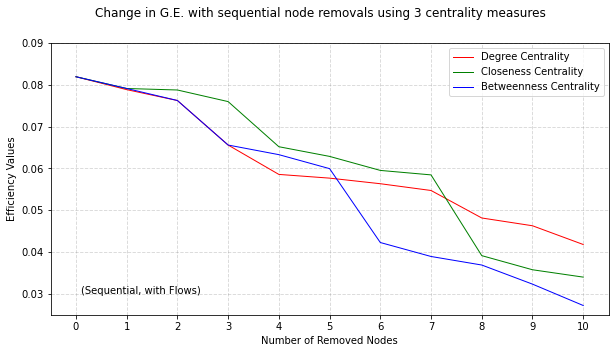

In [92]:
# Three Centralitys Plot
fig, ax = plt.subplots(1,1,figsize=(10,5))
fig.suptitle("Change in G.E. with sequential node removals using 3 centrality measures") # London Underground
ax.plot(degc_w_efficiency1, linewidth=1, color = "red", label = 'Degree Centrality')#rang(0:10),

ax.plot(cloc_w_efficiency1, linewidth=1, color = "green", label = 'Closeness Centrality')#rang(0:10),
ax.plot(betc_w_efficiency1, linewidth=1, color = "blue", label = 'Betweenness Centrality')#rang(0:10),
ax.grid(color='grey', linewidth=0.9, linestyle='--',alpha=0.3) #
ax.set_xlabel("Number of Removed Nodes") # plt.xlabel("Removed node")
ax.set_ylabel("Efficiency Values")   #plt.ylabel("Values")
ax.set_ylim(0.025,0.09)
ax.set_xticks(list(range(0,11)))
# ax.set_xticklabels(betc_t_removednode, rotation=90)# plt.xlabel("Removed node")
ax.legend(loc=1) #'upper left' 'best'
ax.text(0.1,0.03,'(Sequential, with Flows)')

plt.show()

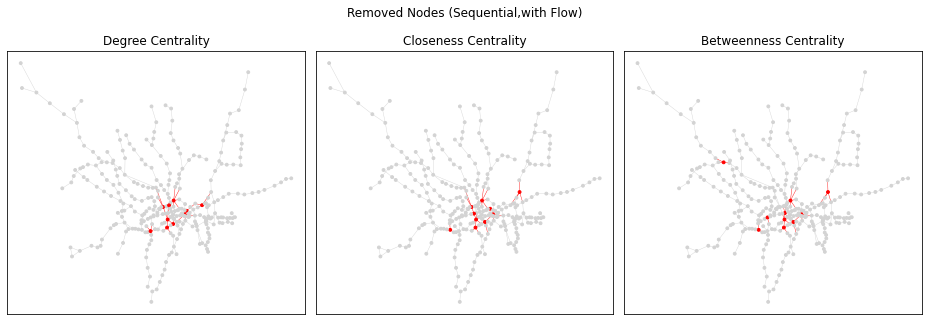

In [93]:
#between  betc_w_removednode1
colorebs1=[]
colornbs1=[]
for n in g_shp_un.nodes():
    nnnn=g_shp_un.nodes[n]['station']
    if nnnn in list(betc_w_removednode1):
        colornbs1.append('red')
    else:
        colornbs1.append('lightgrey')
for e in g_shp_un.edges():
    nnnn1=g_shp_un.edges[e]['station_1_']
    nnnn2=g_shp_un.edges[e]['station_2_']
    if nnnn1 in list(betc_w_removednode1):
        colorebs1.append('red')
    elif nnnn2 in list(betc_w_removednode1):
        colorebs1.append('red')
    else:
        colorebs1.append('lightgrey')
#close
colorecs1=[]
colorncs1=[]
for n in g_shp_un.nodes():
    nnnn=g_shp_un.nodes[n]['station']
    if nnnn in list(cloc_w_removednode1):
        colorncs1.append('red')
    else:
        colorncs1.append('lightgrey')
for e in g_shp_un.edges():
    nnnn1=g_shp_un.edges[e]['station_1_']
    nnnn2=g_shp_un.edges[e]['station_2_']
    if nnnn1 in list(cloc_w_removednode1):
        colorecs1.append('red')
    elif nnnn2 in list(cloc_w_removednode1):
        colorecs1.append('red')
    else:
        colorecs1.append('lightgrey')

#degree
coloreds1=[]
colornds1=[]
for n in g_shp_un.nodes():
    nnnn=g_shp_un.nodes[n]['station']
    if nnnn in list(degc_w_removednode1):
        colornds1.append('red')
    else:
        colornds1.append('lightgrey')
for e in g_shp_un.edges():
    nnnn1=g_shp_un.edges[e]['station_1_']
    nnnn2=g_shp_un.edges[e]['station_2_']
    if nnnn1 in list(degc_w_removednode1):
        coloreds1.append('red')
    elif nnnn2 in list(degc_w_removednode1):
        coloreds1.append('red')
    else:
        coloreds1.append('lightgrey')

#
fig, ax = plt.subplots(1,3,figsize=(13,4.5))
fig.suptitle("Removed Nodes (Sequential,with Flow)")
ax1 = ax[0]
ax2 = ax[1]
ax3 = ax[2]

#ax1
nx.draw_networkx_edges(g_shp_un, pos,edge_color=coloreds1, width=0.4,ax=ax1)
nx.draw_networkx_nodes(g_shp_un, pos = pos, node_color= colornds1,node_size= 8,ax= ax1)
# ax1.set_axis_off()
ax1.set_title("Degree Centrality") #,fontsize=15

#ax2
nx.draw_networkx_edges(g_shp_un, pos,edge_color=colorecs1, width=0.4,ax=ax2)
nx.draw_networkx_nodes(g_shp_un, pos = pos, node_color= colorncs1,node_size= 8,ax= ax2)
# ax3.set_axis_off()
ax2.set_title("Closeness Centrality") #,fontsize=15

#ax3
nx.draw_networkx_edges(g_shp_un, pos,edge_color=colorebs1, width=0.4,ax=ax3)
nx.draw_networkx_nodes(g_shp_un, pos = pos, node_color= colornbs1,node_size= 8,ax= ax3)
# ax3.set_axis_off()
ax3.set_title("Betweenness Centrality") #,fontsize=15



#fig.subplots_adjust(wspace=0.29,hspace=0.0)
fig.tight_layout()
plt.show()

## part 2.2 

In [94]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats
from math import sqrt

In [95]:
def CalcRSqaured(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

In [96]:
# orig_dest = pd.read_csv("ODtube2017.csv")
# orig_dest.head()

In [97]:
orig_dest= orig_dest.drop( columns = ["From", "To"])

In [98]:
g_flows = nx.from_numpy_matrix(adj_c, create_using=nx.DiGraph)
nod_coord = {(e1):coord for e1,coord in g_shp_un.nodes(data='station_coord')}
nod_names = {(e1):name for e1,name in g_shp_un.nodes(data='station')}
v_weights={(e1, e2):round(1./weight,7) for e1, e2, weight in g_flows.edges(data='weight')}
nx.set_node_attributes(g_flows,nod_coord,'station_coord')
nx.set_node_attributes(g_flows,nod_names,'station')
nx.set_edge_attributes(g_flows,v_weights, 'v_weights')

In [99]:
mapping = {i:g_flows.nodes[i]['station'] for i in range(len(g_shp.nodes))}
g_flows = nx.relabel_nodes(g_flows, mapping)
list(g_flows.nodes(data=True))[0:3]

[('Baker Street',
  {'station_coord': (-0.1571, 51.5226), 'station': 'Baker Street'}),
 ('Marylebone',
  {'station_coord': (-0.1631, 51.5225), 'station': 'Marylebone'}),
 ("Regent's Park",
  {'station_coord': (-0.1466, 51.5234), 'station': "Regent's Park"})]

In [100]:
list(g_flows.edges(data = True))[0:3]

[('Baker Street', 'Marylebone', {'weight': 15400.0, 'v_weights': 6.49e-05}),
 ('Baker Street', "Regent's Park", {'weight': 36470.0, 'v_weights': 2.74e-05}),
 ('Baker Street', 'Bond Street', {'weight': 122139.0, 'v_weights': 8.2e-06})]

In [101]:
orig_dest['orig_pop'] = orig_dest.groupby('station_name')['total_wtrips'].transform('sum')
orig_dest['dest_job'] = orig_dest.groupby('station_name1')['total_wtrips'].transform('sum')
orig_dest['dis']=0
orig_dest.head(3)

,station_name,station_name1,total_wtrips,orig_pop,dest_job,dis
0,Acton Town,Alperton,143,5910,2961,0
1,Acton Town,Amersham,22,5910,1384,0
2,Acton Town,Angel,15,5910,17781,0


In [102]:
##nx.dijkstra_path_length(g_flows,'Acton Town','Acton Town',weight= None)

dis=[]
for i, r in orig_dest.iterrows():
    tempd=nx.dijkstra_path_length(g_flows,r['station_name'],r['station_name1'],weight= None) #weight= None
    dis.append(tempd)
    
    
orig_dest['dis']=dis
orig_dest.head(3)

,station_name,station_name1,total_wtrips,orig_pop,dest_job,dis
0,Acton Town,Alperton,143,5910,2961,4
1,Acton Town,Amersham,22,5910,1384,19
2,Acton Town,Angel,15,5910,17781,14


In [103]:
#### 检查是否有距离为0的，结果没有，ok
# orig_dest1=orig_dest[orig_dest.dis== 0]  
# orig_dest1.head()
# orig_dest1=orig_dest.loc[orig_dest['station_name'] == orig_dest['station_name1']]  
# orig_dest1.info()

In [104]:
#take the variables and produce logarithms of them
x_variables = ["orig_pop", "dest_job","dis"]
log_x_vars = []
for x in x_variables:
    orig_dest[f"log_{x}"] = np.log(orig_dest[x])
    log_x_vars.append(f"log_{x}")
orig_dest.head(3)

,station_name,station_name1,total_wtrips,orig_pop,dest_job,dis,log_orig_pop,log_dest_job,log_dis
0,Acton Town,Alperton,143,5910,2961,4,8.684401,7.993282,1.386294
1,Acton Town,Amersham,22,5910,1384,19,8.684401,7.232733,2.944439
2,Acton Town,Angel,15,5910,17781,14,8.684401,9.785886,2.639057


### part 2.2.1 unconstrained model 

In [105]:
#create the formula
formula_u = 'total_wtrips ~ log_orig_pop + log_dest_job + log_dis'  #dis
#run the regression
uncosim = smf.glm(formula = formula_u, data=orig_dest, family=sm.families.Poisson()).fit()
# print(uncosim.summary())

formula_u1 = 'total_wtrips ~ log_orig_pop + log_dest_job + dis'  #dis
uncosim1 = smf.glm(formula = formula_u1, data=orig_dest, family=sm.families.Poisson()).fit()
#print(uncosim1.summary())

In [106]:
#ip
predictionsu =uncosim.get_prediction(orig_dest[["log_orig_pop", "log_dest_job", "log_dis"]])
predictions_summary_frameu = predictionsu.summary_frame()
orig_dest["uncosimest"] = round(predictions_summary_frameu["mean"],0)

#ne
predictionsu1 =uncosim1.get_prediction(orig_dest[["log_orig_pop", "log_dest_job",  "dis"]])
predictions_summary_frameu1 = predictionsu1.summary_frame()
orig_dest["uncosimest1"] = round(predictions_summary_frameu1["mean"],0)

In [107]:
#ip
betau = uncosim.params[-1]
R2u = CalcRSqaured(orig_dest["total_wtrips"], orig_dest["uncosimest"])
RMSEu = CalcRMSE(orig_dest["total_wtrips"], orig_dest["uncosimest"])
print(betau)
print(R2u)
print(RMSEu)

#ne
betau1 = uncosim1.params[-1]
R2u1 = CalcRSqaured(orig_dest["total_wtrips"], orig_dest["uncosimest1"])
RMSEu1 = CalcRMSE(orig_dest["total_wtrips"], orig_dest["uncosimest1"])
print(R2u1)
print(RMSEu1)

-0.5186466735819852
0.4055110010120777
201.253
0.3911063429041902
204.307


In [108]:
orig_dest.head(3)

,station_name,station_name1,total_wtrips,orig_pop,dest_job,dis,log_orig_pop,log_dest_job,log_dis,uncosimest,uncosimest1
0,Acton Town,Alperton,143,5910,2961,4,8.684401,7.993282,1.386294,22.0,25.0
1,Acton Town,Amersham,22,5910,1384,19,8.684401,7.232733,2.944439,6.0,4.0
2,Acton Town,Angel,15,5910,17781,14,8.684401,9.785886,2.639057,42.0,39.0


In [109]:
#orig_dest["unconest"] = np.exp(k + alpha*orig_dest["log_orig_pop"] + gamma*orig_dest["log_dest_job"] + betau*orig_dest["dis"])
# orig_dest["unconest"] = np.exp(k + alpha*orig_dest["log_orig_pop"] + gamma*orig_dest["log_dest_job"] + betau*orig_dest["log_dis"])
# orig_dest["unconest"] = round(orig_dest["unconest"], 0)

In [110]:
# orig_destmat1 = orig_dest.pivot_table(values ="total_wtrips", index='station_name', columns = 'station_name1',
#                             aggfunc=np.sum, margins=True)
# orig_destmat1

In [111]:
# orig_destmat2 = orig_dest.pivot_table(values ="unconest2", index='station_name', columns = 'station_name1',
#                             aggfunc=np.sum, margins=True)
# orig_destmat2

### part 2.2.2 Production-constrained Model

In [112]:
formula_p = 'total_wtrips ~ station_name + log_dest_job + log_dis -1' 
prodsim = smf.glm(formula = formula_p, data=orig_dest, family=sm.families.Poisson()).fit()
#print(prodsim.summary())

formula_p1 = 'total_wtrips ~ station_name + log_dest_job + dis -1' 
prodsim1 = smf.glm(formula = formula_p1, data=orig_dest, family=sm.families.Poisson()).fit()
#print(prodsim.summary())

In [113]:
# orig_dest["prodsimest1"] = np.exp( orig_dest["alpha_i"]+gamma*np.log(orig_dest["dest_job"]) + betap*orig_dest["log_dis"] ) #log_dis
# orig_dest["prodsimest1"] = round(orig_dest["prodsimest1"],0)

In [114]:
#ip
predictionsp =prodsim.get_prediction(orig_dest[["station_name", "log_dest_job","log_dis"]])
predictions_summary_framep = predictionsp.summary_frame()
orig_dest["prodsimest"] = round(predictions_summary_framep["mean"],0)

#ne
predictionsp1 =prodsim1.get_prediction(orig_dest[["station_name", "log_dest_job","dis"]])
predictions_summary_framep1 = predictionsp1.summary_frame()
orig_dest["prodsimest1"] = round(predictions_summary_framep1["mean"],0)

In [115]:
#ip
betap = prodsim.params[-1]
R2p = CalcRSqaured(orig_dest["total_wtrips"], orig_dest["prodsimest"])
RMSEp = CalcRMSE(orig_dest["total_wtrips"], orig_dest["prodsimest"])
print(R2p)
print(RMSEp)

#ne
betap1 = prodsim1.params[-1]
R2p1 = CalcRSqaured(orig_dest["total_wtrips"], orig_dest["prodsimest1"])
RMSEp1 = CalcRMSE(orig_dest["total_wtrips"], orig_dest["prodsimest1"])
print(R2p1)
print(RMSEp1)

0.4296675320476661
196.746
0.4205239368056734
198.955


In [116]:
orig_dest.head(3)

,station_name,station_name1,total_wtrips,orig_pop,dest_job,dis,log_orig_pop,log_dest_job,log_dis,uncosimest,uncosimest1,prodsimest,prodsimest1
0,Acton Town,Alperton,143,5910,2961,4,8.684401,7.993282,1.386294,22.0,25.0,27.0,34.0
1,Acton Town,Amersham,22,5910,1384,19,8.684401,7.232733,2.944439,6.0,4.0,6.0,4.0
2,Acton Town,Angel,15,5910,17781,14,8.684401,9.785886,2.639057,42.0,39.0,42.0,36.0


In [117]:
# xs = np.arange(1.0,20.0,0.25)
# # inverse square power
# y_inv_power = np.power(xs,betap)   #-0.6311
# # negative exponential
# y_neg_exp_point3 = np.exp(betap1*xs)  #-0.1144

# # Now a plot.
# f, ax = plt.subplots(figsize=(8,8))
# ax.plot(xs,y_inv_power, label = "Inverse Power", color = "red")
# ax.plot(xs,y_neg_exp_point3, label = 'Negative Exponential', color = "lightblue")
# ax.legend();

### part 2.2.3 Attraction-Constrained Model

In [118]:
formula_a = 'total_wtrips ~ station_name1 + log_orig_pop + log_dis -1' 
attrsim = smf.glm(formula = formula_a, data=orig_dest, family=sm.families.Poisson()).fit()
# print(attrsim.summary())

formula_a1 = 'total_wtrips ~ station_name1 + log_orig_pop + dis -1' 
attrsim1 = smf.glm(formula = formula_a1, data=orig_dest, family=sm.families.Poisson()).fit()
# print(attrsim1.summary())

In [119]:
#ip
predictionsa =attrsim.get_prediction(orig_dest[["station_name1", "log_orig_pop", "log_dis"]])
predictions_summary_framea = predictionsa.summary_frame()
orig_dest["attrsimest"] = round(predictions_summary_framea["mean"],0)

#ne
predictionsa1 =attrsim1.get_prediction(orig_dest[["station_name1", "log_orig_pop", "dis"]])
predictions_summary_framea1 = predictionsa1.summary_frame()
orig_dest["attrsimest1"] = round(predictions_summary_framea1["mean"],0)

In [120]:
#ip
betaa = attrsim.params[-1]
R2a = CalcRSqaured(orig_dest["total_wtrips"], orig_dest["attrsimest"])
RMSEa = CalcRMSE(orig_dest["total_wtrips"], orig_dest["attrsimest"])
print(R2a)
print(RMSEa)

#ne
betaa1 = attrsim1.params[-1]
R2a1 = CalcRSqaured(orig_dest["total_wtrips"], orig_dest["attrsimest1"])
RMSEa1 = CalcRMSE(orig_dest["total_wtrips"], orig_dest["attrsimest1"])
print(R2a1)
print(RMSEa1)

0.42708019418133475
197.197
0.41791655178328524
199.408


### part 2.2.4 Doubly Constrained Model

In [121]:
formula_d = 'total_wtrips ~ station_name + station_name1 + log_dis -1'
doubsim = smf.glm(formula = formula_d, data=orig_dest, family=sm.families.Poisson()).fit()
# print(doubsim.summary())

formula_d1 = 'total_wtrips ~ station_name + station_name1 + dis -1'
doubsim1 = smf.glm(formula = formula_d1, data=orig_dest, family=sm.families.Poisson()).fit()
# print(doubsim1.summary())

In [122]:
orig_dest["doubsimest"] = np.round(doubsim.predict()) 
orig_dest["doubsimest1"] = np.round(doubsim1.predict()) 
#nip
betad = doubsim.params[-1]
R2d = CalcRSqaured(orig_dest["total_wtrips"], orig_dest["doubsimest"])
RMSEd = CalcRMSE(orig_dest["total_wtrips"], orig_dest["doubsimest"])
print(R2d)
print(RMSEd)
#ne
betad1 = doubsim1.params[-1]
R2d1 = CalcRSqaured(orig_dest["total_wtrips"], orig_dest["doubsimest1"])
RMSEd1 = CalcRMSE(orig_dest["total_wtrips"], orig_dest["doubsimest1"])
print(R2d1)
print(RMSEd1)

0.4571748808598356
191.658
0.45734261462485526
192.208


### part 2.2.5 Plots of SIM

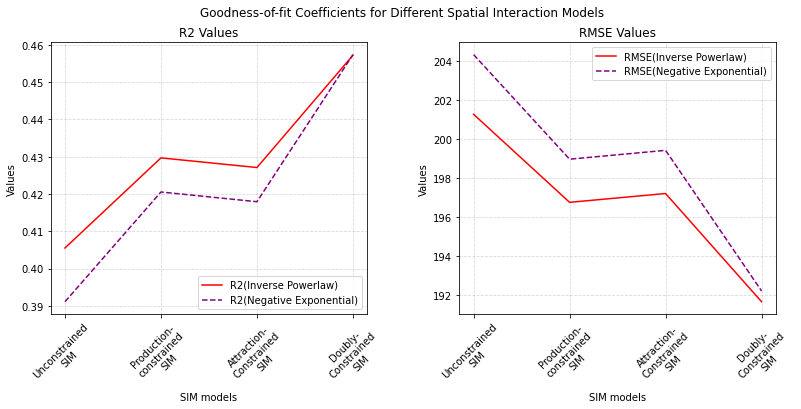

In [123]:
beta_ip = [betau,betap,betaa,betad]
R2s_ip = [R2u,R2p,R2a,R2d]
RMSEs_ip = [RMSEu,RMSEp,RMSEa,RMSEd]

beta_ne = [betau1,betap1,betaa1,betad1]
R2s_ne = [R2u1,R2p1,R2a1,R2d1]
RMSEs_ne = [RMSEu1,RMSEp1,RMSEa1,RMSEd1]

xl = ["Unconstrained\nSIM","Production-\nconstrained\nSIM","Attraction-\nConstrained\nSIM","Doubly-\nConstrained\nSIM"]



fig, ax = plt.subplots(1,2,figsize=(13,5))
fig.suptitle("Goodness-of-fit Coefficients for Different Spatial Interaction Models")
ax1 = ax[0]
ax2 = ax[1]
ax1.set_title('R2 Values') # of Different SIM models and Cost Functions
ax1.plot(R2s_ip, color = "red", label = 'R2(Inverse Powerlaw)') 
ax1.plot(R2s_ne, color = "purple",linestyle='--', label = 'R2(Negative Exponential)') 
ax1.grid(color='grey', linestyle='--',alpha=0.3) 
ax1.set_xlabel("SIM models") 
ax1.set_ylabel("Values") 
ax1.set_xticks(list(range(0,4))) 
ax1.set_xticklabels(xl , rotation=45)
ax1.legend(loc='lower right')

ax2.set_title('RMSE Values') # of Different SIM models and Cost Functions
ax2.plot(RMSEs_ip, color = "red", label = 'RMSE(Inverse Powerlaw)') #,linestyle='--',alpha=0.3
ax2.plot(RMSEs_ne, color = "purple",linestyle='--', label = 'RMSE(Negative Exponential)') #,linestyle='--',alpha=0.3
ax2.grid(color='grey', linestyle='--',alpha=0.3) 
ax2.set_xlabel("SIM models") 
ax2.set_ylabel("Values") 
#ax1.right_ax.set_ylabel('RMSE Values') ###？？？？？    , secondary_y=True
#ax.set_ylim(0.5 ,1.0) #！！！！！！！！！！！！！！！！！
#ax.set_yticklabels(['50%','60%','70%','80%','90%','100%'])
ax2.set_xticks(list(range(0,4))) 
ax2.set_xticklabels(xl , rotation=45)
ax2.legend(loc='best')

fig.subplots_adjust(wspace=0.29,hspace=0.0)
plt.show()

## part 2.3
### part 2.3.1 Scenario A

In [124]:
def new_sal(row):
    if row["station_name1"] == "Canary Wharf":
        val = 0.5*row["dest_job"]
    else:
        val = row["dest_job"]
    return val

orig_dest["dest_job_sa"] = orig_dest.apply(new_sal, axis =1)
# orig_dest.head(3)

In [125]:
# orig_dest= orig_dest.drop(columns = ["alpha_i", "Ai1","A_i", "A_i2","prodsimestsa", "diff_abs"])  #""unconest", "prodsimest1", "alpha_i"

In [126]:
# orig_dest.head(3)

In [127]:
# coefs = pd.DataFrame(prodsim.params)
# coefs.reset_index(inplace=True)
# coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)
# to_repl = ["(station_name)", "\[", "\]"]  
# for x in to_repl:
#     coefs["coef"] = coefs["coef"].str.replace(x, "")
# orig_dest = orig_dest.merge(coefs, left_on="station_name", right_on="coef", how = "left")
# orig_dest.drop(columns = ["coef"], inplace = True)

# orig_dest.head()

In [128]:
# alpha_i = prodsim.params[0:-2] #alphai已经不重要
# gamma = prodsim.params[-2]  #！关键是gamma和beta！
# betap = prodsim.params[-1]

In [129]:
# orig_dest["prodsimesta"] = np.exp( orig_dest["alpha_i"]+gamma*np.log(orig_dest["dest_job_sa"]) + betap*orig_dest["log_dis"] )
# orig_dest["prodsimesta"] = round(orig_dest["prodsimesta"],0)

In [130]:
#下面是PRAC3里面的

In [131]:
# #calculate some new wj^alpha and d_ij^beta values
# Dj2_gamma = orig_dest["dest_job"]**gamma
# dist_beta = orig_dest["dis"]**betap
# #calcualte the first stage of the Ai values
# orig_dest["Ai1"] = Dj2_gamma * dist_beta
# #now do the sum over all js bit
# A_i = pd.DataFrame(orig_dest.groupby(["station_name"])["Ai1"].agg(np.sum))
# #now divide into 1
# A_i["Ai1"] = 1/A_i["Ai1"]
# A_i.rename(columns={"Ai1":"A_i"}, inplace=True)
# #and write the A_i values back into the dataframe
# orig_dest = orig_dest.merge(A_i, left_on="station_name", right_index=True, how="left")



# orig_dest["prodsimestsa"] = orig_dest["A_i"]*orig_dest["orig_pop"]*Dj2_gamma*dist_beta
# #round
# orig_dest["prodsimestsa"] = round(orig_dest["prodsimestsa"])
# #check
# orig_dest[["prodsimest", "prodsimestsa"]]

In [132]:
#先算AI DJ
#calculate some new wj^alpha and d_ij^beta values
gamma = prodsim.params[-2]
dj_gamma = orig_dest["dest_job_sa"]**gamma
dist_beta = orig_dest["dis"]**betap
#calcualte the first stage of the Ai values
orig_dest["Ai1"] = dj_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(orig_dest.groupby(["station_name"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i"}, inplace=True)
#and write the A_i values back into the dataframe
orig_dest = orig_dest.merge(A_i, left_on="station_name", right_index=True, how="left")



#然后测算
orig_dest["prodsimestsa"] = orig_dest["A_i"]*orig_dest["orig_pop"]*dj_gamma*dist_beta
#round
orig_dest["prodsimestsa"] = round(orig_dest["prodsimestsa"])
#check
orig_dest[["prodsimest", "prodsimestsa"]]

,prodsimest,prodsimestsa
0,27.0,27.0
1,6.0,6.0
2,42.0,42.0
3,21.0,21.0
4,8.0,8.0
...,...,...
34053,134.0,135.0
34054,15.0,15.0
34055,39.0,40.0
34056,57.0,58.0


In [133]:
print(sum(orig_dest["prodsimestsa"])-sum(orig_dest["prodsimest"]))

21.0


In [134]:
#plot for the SA
diff_sa = orig_dest.groupby('station_name1',as_index=False).agg({'prodsimest':'sum','prodsimestsa':'sum'})
diff_sa["diff"]= diff_sa["prodsimestsa"] - diff_sa["prodsimest"]

diff_sa["diff_abs"]= abs(diff_sa["diff"])
diff_sa.sort_values(by=["diff_abs"],ascending= False, inplace = True)
diff_sa = diff_sa.head(31)
diff_sa

,station_name1,prodsimest,prodsimestsa,diff,diff_abs
36,Canary Wharf,49686.0,30911.0,-18775.0,18775.0
11,Bank,92016.0,92649.0,633.0,633.0
242,Waterloo,80956.0,81509.0,553.0,553.0
136,Liverpool Street,71759.0,72262.0,503.0,503.0
167,Oxford Circus,76470.0,76972.0,502.0,502.0
126,King's Cross St. Pancras,75557.0,76036.0,479.0,479.0
137,London Bridge,61452.0,61889.0,437.0,437.0
237,Victoria,66849.0,67285.0,436.0,436.0
216,Stratford,52969.0,53382.0,413.0,413.0
90,Green Park,52606.0,52948.0,342.0,342.0


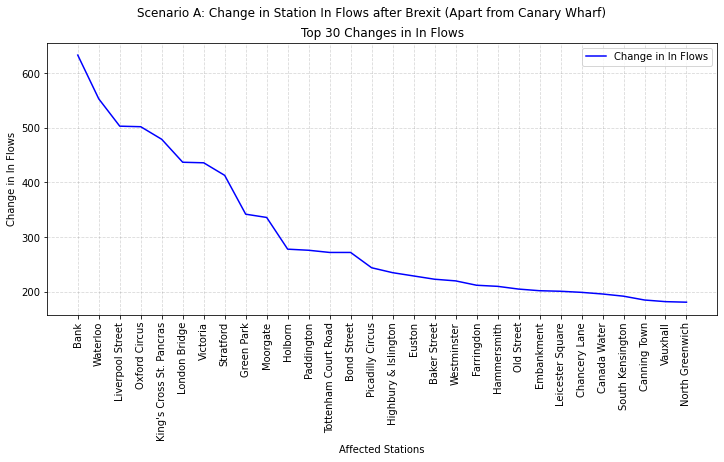

In [135]:
#plot for the SA
fig, ax = plt.subplots(1,1,figsize=(12,5))
fig.suptitle("Scenario A: Change in Station In Flows after Brexit (Apart from Canary Wharf)") #Decrease in Canary Wharf's jobs
ax.plot(list(diff_sa['diff'])[1:], color = "blue", label = 'Change in In Flows') 
ax.grid(color='grey', linestyle='--',alpha=0.3) 
ax.set_xlabel("Affected Stations") 
ax.set_ylabel("Change in In Flows")  
#ax1.set_ylim(-200,200) #！！！！！！！！！！！！！！！！！
ax.set_xticks(list(range(30))) 
ax.set_xticklabels(list(diff_sa['station_name1'])[1:], rotation=90)
ax.legend(loc=1)
ax.set_title('Top 30 Changes in In Flows')
plt.show()

### part 2.3.2 Scenario B

In [136]:
# orig_dest= orig_dest.drop( columns = ["Ai1", "A_i1", "Ai2","A_i2", "prodsimestsb1", "prodsimestsb2"])  #""unconest", "prodsimest1", "alpha_i"

In [137]:
 orig_dest.head(3)

,station_name,station_name1,total_wtrips,orig_pop,dest_job,dis,log_orig_pop,log_dest_job,log_dis,uncosimest,...,prodsimest,prodsimest1,attrsimest,attrsimest1,doubsimest,doubsimest1,dest_job_sa,Ai1,A_i,prodsimestsa
0,Acton Town,Alperton,143,5910,2961,4,8.684401,7.993282,1.386294,22.0,...,27.0,34.0,42.0,54.0,47.0,62.0,2961.0,110.161711,0.000041,27.0
1,Acton Town,Amersham,22,5910,1384,19,8.684401,7.232733,2.944439,6.0,...,6.0,4.0,8.0,7.0,8.0,6.0,1384.0,24.166474,0.000041,6.0
2,Acton Town,Angel,15,5910,17781,14,8.684401,9.785886,2.639057,42.0,...,42.0,36.0,31.0,26.0,30.0,22.0,17781.0,174.223031,0.000041,42.0


In [138]:
## 先算AI DJ
dj_gamma2 = orig_dest["dest_job"]**gamma

dist_beta1 = orig_dest["dis"]**(-1.5)
orig_dest["Ai1"] = dj_gamma2 * dist_beta1
A_i = pd.DataFrame(orig_dest.groupby(["station_name"])["Ai1"].agg(np.sum))
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i1"}, inplace=True)
orig_dest = orig_dest.merge(A_i, left_on="station_name", right_index=True, how="left")

dist_beta2 = orig_dest["dis"]**(-2.0)
orig_dest["Ai2"] = dj_gamma2 * dist_beta2
A_i = pd.DataFrame(orig_dest.groupby(["station_name"])["Ai2"].agg(np.sum))
A_i["Ai2"] = 1/A_i["Ai2"]
A_i.rename(columns={"Ai2":"A_i2"}, inplace=True)
orig_dest = orig_dest.merge(A_i, left_on="station_name", right_index=True, how="left")
#然后测算
orig_dest["prodsimestsb1"] = orig_dest["A_i1"]*orig_dest["orig_pop"]*dj_gamma2*dist_beta1
orig_dest["prodsimestsb1"] = round(orig_dest["prodsimestsb1"])

orig_dest["prodsimestsb2"] = orig_dest["A_i2"]*orig_dest["orig_pop"]*dj_gamma2*dist_beta2
orig_dest["prodsimestsb2"] = round(orig_dest["prodsimestsb2"])
#check
orig_dest[["prodsimest", "prodsimestsb1","prodsimestsb2"]] #

,prodsimest,prodsimestsb1,prodsimestsb2
0,27.0,36.0,32.0
1,6.0,2.0,1.0
2,42.0,19.0,9.0
3,21.0,9.0,4.0
4,8.0,3.0,1.0
...,...,...,...
34053,134.0,98.0,64.0
34054,15.0,9.0,5.0
34055,39.0,283.0,696.0
34056,57.0,45.0,30.0


In [139]:
#plot for the SA
orig_dest_sb = orig_dest.groupby('station_name1',as_index=False).agg({'prodsimest':'sum'})
orig_dest_sb.sort_values(by=["prodsimest"],ascending= False, inplace = True)
orig_dest_sb1 = orig_dest.groupby('station_name1',as_index=False).agg({'prodsimestsb1':'sum'})
orig_dest_sb1.sort_values(by=["prodsimestsb1"],ascending= False, inplace = True)
orig_dest_sb2 = orig_dest.groupby('station_name1',as_index=False).agg({'prodsimestsb2':'sum'})
orig_dest_sb2.sort_values(by=["prodsimestsb2"],ascending= False, inplace = True)

orig_dest_sbx = orig_dest.groupby('station_name1',as_index=False).agg({'prodsimest':'sum','prodsimestsb1':'sum','prodsimestsb2':'sum'})
orig_dest_sbx.sort_values(by=["prodsimest"],ascending= False, inplace = True)
len(orig_dest_sbx)

265

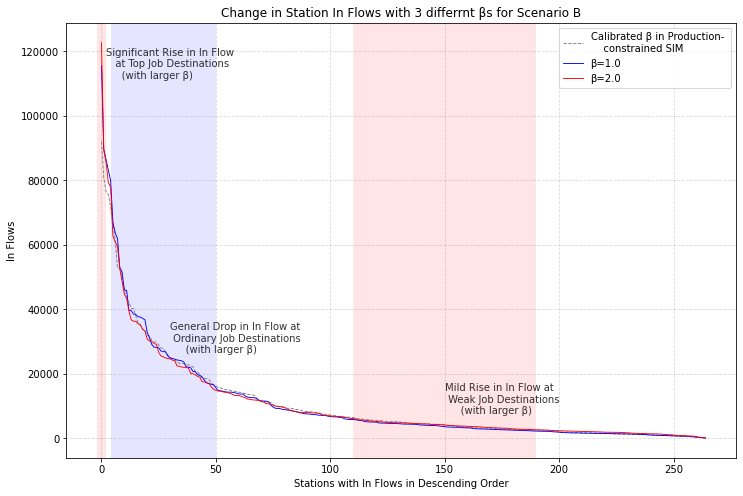

In [140]:
#plot for the SB
fig, ax = plt.subplots(1,1,figsize=(12,8))

# fig.suptitle("Scenario B: Change in Station In Flows with 3 differrnt βs") #Decrease in Canary Wharf's jobs
ax.grid(color='grey', linestyle='--',alpha=0.3) 
ax.axvspan(4, 50, facecolor='b', alpha=0.1)
ax.axvspan(-2,2, facecolor='r', alpha=0.1)
ax.axvspan(110, 190, facecolor='r', alpha=0.1)

ax.plot(list(orig_dest_sb['prodsimest']), linewidth=0.9, color = "grey", label = 'Calibrated β in Production- \n    constrained SIM', linestyle='--')  #[:50] ,alpha=0.8
ax.plot(list(orig_dest_sb1['prodsimestsb1']), linewidth=0.9 , color = "blue", label = 'β=1.0') 
ax.plot(list(orig_dest_sb2['prodsimestsb2']), linewidth=0.9 , color = "red", label = 'β=2.0') 
t1="Significant Rise in In Flow\n   at Top Job Destinations\n     (with larger β)"
t2="General Drop in In Flow at \n Ordinary Job Destinations\n     (with larger β)"
t3="Mild Rise in In Flow at \n Weak Job Destinations\n     (with larger β)"


ax.text(2,112000, t1, ha='left', rotation=0, alpha=0.8, wrap=True) 
ax.text(30,27000, t2, ha='left', rotation=0, alpha=0.8, wrap=True) 
ax.text(150,8000, t3, ha='left', rotation=0, alpha=0.8, wrap=True) 
ax.set_xlabel("Stations with In Flows in Descending Order") 
ax.set_ylabel("In Flows")  
ax.legend(loc=1) # #loc=3

#ax.set_xticks([i for i in range(1,265)])  #len(orig_dest_sbx)
#ax.set_xticklabels(list(orig_dest_sbx['station_name1']), rotation=90)
ax.set_title('Change in Station In Flows with 3 differrnt βs for Scenario B')
plt.show()

In [141]:
orig_dest.head(3)

,station_name,station_name1,total_wtrips,orig_pop,dest_job,dis,log_orig_pop,log_dest_job,log_dis,uncosimest,...,doubsimest1,dest_job_sa,Ai1,A_i,prodsimestsa,A_i1,Ai2,A_i2,prodsimestsb1,prodsimestsb2
0,Acton Town,Alperton,143,5910,2961,4,8.684401,7.993282,1.386294,22.0,...,62.0,2961.0,33.111050,0.000041,27.0,0.000185,16.555525,0.000326,36.0,32.0
1,Acton Town,Amersham,22,5910,1384,19,8.684401,7.232733,2.944439,6.0,...,6.0,1384.0,1.880969,0.000041,6.0,0.000185,0.431524,0.000326,2.0,1.0
2,Acton Town,Angel,15,5910,17781,14,8.684401,9.785886,2.639057,42.0,...,22.0,17781.0,17.671608,0.000041,42.0,0.000185,4.722936,0.000326,19.0,9.0


In [142]:
#plot for the Sb1
diff_sb1 = orig_dest.groupby('station_name1',as_index=False).agg({'prodsimest':'sum','prodsimestsb1':'sum'})
diff_sb1["diff"]= diff_sb1["prodsimestsb1"] - diff_sb1["prodsimest"]
#prodsimestsb2
diff_sb1["diff_abs"]= abs(diff_sb1["diff"])
diff_sb1.sort_values(by=["diff_abs"],ascending= False, inplace = True)
diff_sb1 = diff_sb1.head(30)
diff_sb1

,station_name1,prodsimest,prodsimestsb1,diff,diff_abs
11,Bank,92016.0,115552.0,23536.0,23536.0
126,King's Cross St. Pancras,75557.0,86457.0,10900.0,10900.0
90,Green Park,52606.0,61954.0,9348.0,9348.0
242,Waterloo,80956.0,89702.0,8746.0,8746.0
136,Liverpool Street,71759.0,79948.0,8189.0,8189.0
167,Oxford Circus,76470.0,83323.0,6853.0,6853.0
147,Moorgate,46263.0,52996.0,6733.0,6733.0
249,West Ham,14265.0,20706.0,6441.0,6441.0
29,Brixton,22250.0,16610.0,-5640.0,5640.0
94,Hammersmith,31707.0,26861.0,-4846.0,4846.0


In [143]:
#plot for the Sb1
diff_sb2 = orig_dest.groupby('station_name1',as_index=False).agg({'prodsimest':'sum','prodsimestsb2':'sum'})
diff_sb2["diff"]= diff_sb2["prodsimestsb2"] - diff_sb2["prodsimest"]
#prodsimestsb2
diff_sb2["diff_abs"]= abs(diff_sb2["diff"])
diff_sb2.sort_values(by=["diff_abs"],ascending= False, inplace = True)
diff_sb2 = diff_sb2.head(30)
diff_sb2

,station_name1,prodsimest,prodsimestsb2,diff,diff_abs
11,Bank,92016.0,122685.0,30669.0,30669.0
126,King's Cross St. Pancras,75557.0,89394.0,13837.0,13837.0
249,West Ham,14265.0,26661.0,12396.0,12396.0
90,Green Park,52606.0,62678.0,10072.0,10072.0
168,Paddington,42294.0,33240.0,-9054.0,9054.0
29,Brixton,22250.0,13252.0,-8998.0,8998.0
42,Chancery Lane,26702.0,20087.0,-6615.0,6615.0
147,Moorgate,46263.0,52794.0,6531.0,6531.0
154,North Greenwich,22912.0,29394.0,6482.0,6482.0
109,Holborn,40315.0,33850.0,-6465.0,6465.0


In [144]:
# #plot for the SA
# fig, ax = plt.subplots(1,1,figsize=(11,5))
# fig.suptitle("Scenario B1: Change in Station In Flows after Setting βto 1.0") #Decrease in Canary Wharf's jobs
# ax.plot(list(diff_sb1['diff']), color = "blue", label = 'Change in In Flows') 
# ax.plot([0]*30, color = "red", linestyle='--',linewidth=1.5 ) 
# ax.grid(color='grey', linestyle='--',alpha=0.3) 
# ax.set_xlabel("Affected Stations") 
# ax.set_ylabel("Change in In Flows")  
# #ax1.set_ylim(-200,200) #！！！！！！！！！！！！！！！！！
# ax.set_xticks(list(range(30))) 
# ax.set_xticklabels(list(diff_sb1['station_name1']), rotation=90) #[1:]
# ax.legend(loc=1)
# ax.set_title('Top 30 Changes in In Flows(β=2.0)')
# plt.show()

In [145]:
# #plot for the Sb2
# fig, ax = plt.subplots(1,1,figsize=(13,5))
# fig.suptitle("Scenario B2: Change in Station In Flows after Setting β to 3.0") #Decrease in Canary Wharf's jobs
# ax.plot(list(diff_sb2['diff']), color = "blue", label = 'Change in In Flows') 
# ax.plot([0]*30, color = "red", linestyle='--',linewidth=1.5 ) 
# ax.grid(color='grey', linestyle='--',alpha=0.3) 
# ax.set_xlabel("Affected Stations") 
# ax.set_ylabel("Change in In Flows")  
# #ax1.set_ylim(-200,200) #！！！！！！！！！！！！！！！！！
# ax.set_xticks(list(range(30))) 
# ax.set_xticklabels(list(diff_sb2['station_name1']), rotation=90) #[1:]
# ax.legend(loc=1)
# ax.set_title('Top 30 Changes in In Flows(β=3.0)')
# plt.show()

In [146]:
# #plot for the SA
# fig, ax = plt.subplots(2,1,figsize=(12,10))
# fig.suptitle("Scenario B1: Change in Station In Flows after Setting βto 2.0") 

# ax[0].plot(list(diff_sb1['diff']), color = "blue", label = 'Change in In Flows') 
# ax[0].plot([0]*30, color = "red", linestyle='--',linewidth=1.5 ) 
# ax[0].grid(color='grey', linestyle='--',alpha=0.3) 
# ax[0].set_xlabel("Affected Stations") 
# ax[0].set_ylabel("Change in In Flows")  
# ax[0].set_xticks(list(range(30))) 
# ax[0].set_xticklabels(list(diff_sb1['station_name1']), rotation=90) #[1:]
# ax[0].legend(loc=1)
# ax[0].set_title('Top 30 Changes in In Flows(β=1.0)')


# #plot for the Sb2

# ax[1].plot(list(diff_sb2['diff']), color = "blue", label = 'Change in In Flows') 
# ax[1].plot([0]*30, color = "red", linestyle='--',linewidth=1.5 ) 
# ax[1].grid(color='grey', linestyle='--',alpha=0.3) 
# ax[1].set_xlabel("Affected Stations") 
# ax[1].set_ylabel("Change in In Flows")  
# ax[1].set_xticks(list(range(30))) 
# ax[1].set_xticklabels(list(diff_sb2['station_name1']), rotation=90) #[1:]
# ax[1].legend(loc=1)
# ax[1].set_title('Top 30 Changes in In Flows(β=3.0)')
# fig.subplots_adjust(wspace=0,hspace=0.9)
# plt.show()

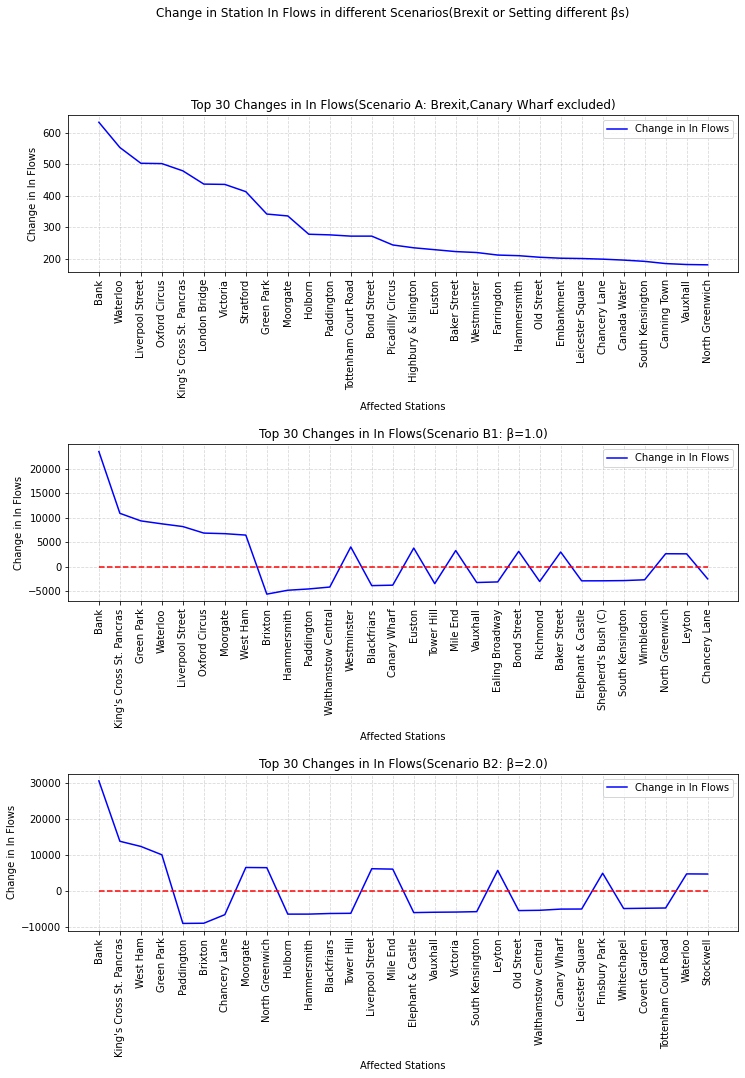

In [147]:
#plot for the SA
fig, ax = plt.subplots(3,1,figsize=(12,15))
fig.suptitle("Change in Station In Flows in different Scenarios(Brexit or Setting different βs)") 
# fig.suptitle("Scenario A: Change in Station In Flows after  (Apart from Canary Wharf)") #Decrease in Canary Wharf's jobs

ax[0].plot(list(diff_sa['diff'])[1:], color = "blue", label = 'Change in In Flows') 
ax[0].grid(color='grey', linestyle='--',alpha=0.3) 
ax[0].set_xlabel("Affected Stations") 
ax[0].set_ylabel("Change in In Flows")  
ax[0].set_xticks(list(range(30))) 
ax[0].set_xticklabels(list(diff_sa['station_name1'])[1:], rotation=90)
ax[0].legend(loc=1)
ax[0].set_title('Top 30 Changes in In Flows(Scenario A: Brexit,Canary Wharf excluded)')

ax[1].plot(list(diff_sb1['diff']), color = "blue", label = 'Change in In Flows') 
ax[1].plot([0]*30, color = "red", linestyle='--',linewidth=1.5 ) 
ax[1].grid(color='grey', linestyle='--',alpha=0.3) 
ax[1].set_xlabel("Affected Stations") 
ax[1].set_ylabel("Change in In Flows")  
ax[1].set_xticks(list(range(30))) 
ax[1].set_xticklabels(list(diff_sb1['station_name1']), rotation=90) #[1:]
ax[1].legend(loc=1)
ax[1].set_title('Top 30 Changes in In Flows(Scenario B1: β=1.0)')


#plot for the Sb2

ax[2].plot(list(diff_sb2['diff']), color = "blue", label = 'Change in In Flows') 
ax[2].plot([0]*30, color = "red", linestyle='--',linewidth=1.5 ) 
ax[2].grid(color='grey', linestyle='--',alpha=0.3) 
ax[2].set_xlabel("Affected Stations") 
ax[2].set_ylabel("Change in In Flows")  
ax[2].set_xticks(list(range(30))) 
ax[2].set_xticklabels(list(diff_sb2['station_name1']), rotation=90) #[1:]
ax[2].legend(loc=1)
ax[2].set_title('Top 30 Changes in In Flows(Scenario B2: β=2.0)')
fig.subplots_adjust(wspace=0,hspace=1.1)
plt.show()

In [148]:
# print(beta_ip)
# print(R2s_ip)
# print(RMSEs_ip)

# print(beta_ne)
# print(R2s_ne)
# print(RMSEs_ne)